# Milestone 02 fase 01

# I. Perkenalan

`Muhammad Sofyan Nurul Jamal - FTDS Batch 004`




- [Hugging Face](https://huggingface.co/spaces/Sofyan19/Telco_customer_churn_ML2)


## Dataset Description

- Dataset ini adalah dataset tentang churn pelanggan dari perusahaan telekomunikasi. Churn adalah ketika pelanggan memutuskan untuk tidak lagi menggunakan layanan perusahaan dan beralih ke layanan perusahaan lain. Dataset ini berisi informasi tentang pelanggan, termasuk lokasi geografis, jenis layanan yang mereka gunakan, durasi layanan, tagihan bulanan, dan alasan mereka beralih atau tetap menggunakan layanan perusahaan.

## Problem Statement

- Membuat model Classification untuk memprediksi Churn Value menggunakan dataset yang sudah kita simpan.

## Objective 

1.  Melakukan Explorasi EDA

- Bagaimana Sebaran Data Churn Value?

- Tipe Paket apa yang paling banyak diminati?

- Bagaimana Sebaran pelanggan dilihat dari Gendernya?


2.  Mampu mengevaluasi konsep Machine Learning pada pembelajaran Phase 1 sebagai berikut:

- Mampu memahami konsep Machine Learning secara keseluruhan.

- Mampu mempersiapkan data untuk digunakan dalam model Supervised Learning atau Unsupervised Learning.

- Mampu mengimplementasikan Supervised Learning atau Unsupervised Learning dengan data yang dipilih.

- Mampu melakukan Hyperparameter Tuning dan Model Improvement.

- Mampu melakukan Model Deployment.

# II. Sumber Data

- [Telco customer churn: IBM dataset](https://www.kaggle.com/datasets/yeanzc/telco-customer-churn-ibm-dataset)

# III. Import Library

In [1]:
# Data Loading
import pandas as pd
from pandas.api.types import CategoricalDtype

#Importing Warning filtering
import warnings
warnings.filterwarnings('ignore')

# Exploratory Data Analysis
import matplotlib.pyplot as plt
import seaborn as sns
import phik
from phik.report import plot_correlation_matrix
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from feature_engine.outliers import Winsorizer
from sklearn.compose import ColumnTransformer
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from imblearn.over_sampling import ADASYN

# Feature Selection (manual)
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Model Definition
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform



# Model Evaluation
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score,classification_report,ConfusionMatrixDisplay,confusion_matrix


# Model Inference
import pickle

# Calculate VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# For showing our time
import time


# IV. Data Loading

Data hasil Query kami import kedalam notebook dan memasukkannya dalam dataframe dengan nama 'df'

In [2]:
df = pd.read_excel('Telco_customer_churn.xlsx')

Selanjutnya kita akan melihat sekilas Tampilan data.

## Overview Data

Pertama tama kita kan menampilkan 10 data pertama dan 10 data terakhir dari dataset.

In [3]:
df.head(10) # Tampilkan 10 data pertama

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
5,4190-MFLUW,1,United States,California,Los Angeles,90020,"34.066367, -118.309868",34.066367,-118.309868,Female,...,Month-to-month,No,Credit card (automatic),55.20,528.35,Yes,1,78,5925,Competitor offered higher download speeds
6,8779-QRDMV,1,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582,Male,...,Month-to-month,Yes,Electronic check,39.65,39.65,Yes,1,100,5433,Competitor offered more data
7,1066-JKSGK,1,United States,California,Los Angeles,90024,"34.066303, -118.435479",34.066303,-118.435479,Male,...,Month-to-month,No,Mailed check,20.15,20.15,Yes,1,92,4832,Competitor made better offer
8,6467-CHFZW,1,United States,California,Los Angeles,90028,"34.099869, -118.326843",34.099869,-118.326843,Male,...,Month-to-month,Yes,Electronic check,99.35,4749.15,Yes,1,77,5789,Competitor had better devices
9,8665-UTDHZ,1,United States,California,Los Angeles,90029,"34.089953, -118.294824",34.089953,-118.294824,Male,...,Month-to-month,No,Electronic check,30.20,30.2,Yes,1,97,2915,Competitor had better devices


In [4]:
df.tail(10) # Tampilan 10 data terbawah

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
7033,0871-OPBXW,1,United States,California,Twentynine Palms,92277,"34.17211, -115.769773",34.172110,-115.769773,Female,...,Month-to-month,Yes,Mailed check,20.05,39.25,No,0,80,5191,NaN
7034,3605-JISKB,1,United States,California,Twentynine Palms,92278,"34.457829, -116.139589",34.457829,-116.139589,Male,...,One year,No,Credit card (automatic),60.00,3316.1,No,0,71,4212,NaN
7035,9767-FFLEM,1,United States,California,Westmorland,92281,"33.03679, -115.60503",33.036790,-115.605030,Male,...,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,No,0,35,4591,NaN
7036,8456-QDAVC,1,United States,California,Winterhaven,92283,"32.852947, -114.850784",32.852947,-114.850784,Male,...,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.1,No,0,20,2464,NaN
7037,7750-EYXWZ,1,United States,California,Yucca Valley,92284,"34.159534, -116.425984",34.159534,-116.425984,Female,...,One year,No,Electronic check,60.65,743.3,No,0,24,3740,NaN
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN
7042,3186-AJIEK,1,United States,California,Apple Valley,92308,"34.424926, -117.184503",34.424926,-117.184503,Male,...,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No,0,38,5097,NaN


Terlihat 10 data pertama dan 10 data terakhir dari dataset, disini sekilas data yang kita punya telah melalui proses encoding misalnya pada kolom sex,  education_level  marital_status. ditulis dengan angka yang sudah ditentukan.

Berikut adalah penjelasan untuk setiap kolom pada data tersebut:

- CustomerID : ID pelanggan yang unik

- Count : jumlah pengamatan pelanggan dengan ID tersebut

- Country : negara tempat pelanggan berada

- State : negara bagian tempat pelanggan berada

- City : kota tempat pelanggan berada

- Zip Code : kode pos tempat pelanggan berada

- Lat Long : koordinat pelanggan (latitude dan longitude)

- Latitude : latitude tempat pelanggan berada

- Longitude : longitude tempat pelanggan berada

- Gender : jenis kelamin pelanggan

- Senior Citizen : apakah pelanggan seorang warga senior atau tidak

- Partner : apakah pelanggan memiliki pasangan atau tidak

- Dependents : apakah pelanggan memiliki tanggungan atau tidak

- Tenure : lama berlangganan pelanggan (dalam bulan)

- Phone Service : apakah pelanggan berlangganan layanan telepon atau tidak

- Multiple Lines : apakah pelanggan berlangganan beberapa layanan telepon atau tidak

- Internet Service : jenis layanan internet yang diambil pelanggan

- Online Security : apakah pelanggan memilih layanan keamanan online atau tidak

- Online Backup : apakah pelanggan memilih layanan backup online atau tidak

- Device Protection : apakah pelanggan memilih layanan perlindungan perangkat atau tidak

- Tech Support : apakah pelanggan memilih layanan dukungan teknis atau tidak

- Streaming TV : apakah pelanggan berlangganan layanan streaming TV atau tidak

- Streaming Movies : apakah pelanggan berlangganan layanan streaming film atau tidak

- Contract : jenis kontrak berlangganan yang diambil oleh pelanggan

- Paperless Billing : apakah pelanggan menggunakan tagihan elektronik atau tidak

- Payment Method : metode pembayaran yang digunakan pelanggan

- Monthly Charges : jumlah biaya bulanan yang dibayarkan oleh pelanggan

- Total Charges : total biaya yang telah dibayarkan oleh pelanggan

- Churn Label : apakah pelanggan memutuskan untuk berhenti berlangganan atau tidak

- Churn Value : 1 jika pelanggan memutuskan untuk berhenti berlangganan dan 0 jika tidak berhenti

- Churn Reason : alasan pelanggan untuk berhenti berlangganan

Selanjunya kita akan melihat ada berapa baris dan kolom yang ada.

In [5]:
df.shape # melihat dimensi data

(7043, 33)

Disini terlihat dalam dataset terdapat 7043 baris dan 33 kolom. Selanjutnya kita akan melihat tipe data yang kita punya.

In [6]:
df.info() # Mengecheck tipe data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

- Sekilas dari hasil info yang kita dapat data set kita terdiri 3 float, 6 int64 dan 24 object. kemudian kita akan memeriksa missing value dalam data set.

In [7]:
df.isnull().sum() #  memeriksa dan menjumlahkan missing value

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [8]:
missing_percentage = df.isna().sum() / len(df) * 100
print(missing_percentage)
# presentase missing value

CustomerID            0.000000
Count                 0.000000
Country               0.000000
State                 0.000000
City                  0.000000
Zip Code              0.000000
Lat Long              0.000000
Latitude              0.000000
Longitude             0.000000
Gender                0.000000
Senior Citizen        0.000000
Partner               0.000000
Dependents            0.000000
Tenure Months         0.000000
Phone Service         0.000000
Multiple Lines        0.000000
Internet Service      0.000000
Online Security       0.000000
Online Backup         0.000000
Device Protection     0.000000
Tech Support          0.000000
Streaming TV          0.000000
Streaming Movies      0.000000
Contract              0.000000
Paperless Billing     0.000000
Payment Method        0.000000
Monthly Charges       0.000000
Total Charges         0.000000
Churn Label           0.000000
Churn Value           0.000000
Churn Score           0.000000
CLTV                  0.000000
Churn Re

Dalam pemeriksaan missing value, ditemukan bahwa data tidak memiliki nilai-nilai yang hilang, kecuali pada variabel Churn Reason yang memiliki missing value sebesar 5174 baris (73%). Hal ini mungkin menunjukkan bahwa tidak semua pelanggan yang berpindah meninggalkan alasan tertentu, atau data tentang alasan pindah tidak dicatat dengan lengkap. ditahap berikutnya akan dilakukan analisa lanjutan.

In [9]:
print(df.columns.values) # melihat kolom yang kita punya

['CustomerID' 'Count' 'Country' 'State' 'City' 'Zip Code' 'Lat Long'
 'Latitude' 'Longitude' 'Gender' 'Senior Citizen' 'Partner' 'Dependents'
 'Tenure Months' 'Phone Service' 'Multiple Lines' 'Internet Service'
 'Online Security' 'Online Backup' 'Device Protection' 'Tech Support'
 'Streaming TV' 'Streaming Movies' 'Contract' 'Paperless Billing'
 'Payment Method' 'Monthly Charges' 'Total Charges' 'Churn Label'
 'Churn Value' 'Churn Score' 'CLTV' 'Churn Reason']


In [10]:
df[df.duplicated()].shape # melihat ada tidaknya data yang terduplikat

(0, 33)

Terlihat dalam data set  tidak ditemukan data yang terduplikasi.

Berikut ikhtisar dari beberapa overview yang telah kita lakukan;

1. dalam dataset terdapat 7043 baris dan 33 kolom.

2. Dalam pemeriksaan missing value, ditemukan bahwa data tidak memiliki nilai-nilai yang hilang, kecuali pada variabel Churn Reason yang memiliki missing value sebesar 5174 baris. Hal ini mungkin menunjukkan bahwa tidak semua pelanggan yang berpindah meninggalkan alasan tertentu, atau data tentang alasan pindah tidak dicatat dengan lengkap. ditahap berikutnya akan dilakukan analisa lanjutan.

3. Terlihat dalam data set  tidak ditemukan data yang terduplikasi.

## Data Cleaning

Disini kita akan mengcleaning data dengan menghandle data yang mengandung missing value atau yang terduplikasi dll. Pertama tama dataframe yang digunakan  akan disimpan dengan nama df_clean

In [11]:
df_clean = df.copy()      # dataframe yang digunakan pada sesi ini akan disimpan dengan nama df_clean 
df_clean.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [12]:
df_clean.isnull().sum() #  memeriksa dan menjumlahkan missing value 

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

- Dalam pemeriksaan standart missing value, ditemukan bahwa data tidak memiliki nilai-nilai yang hilang, kecuali pada variabel Churn Reason yang memiliki missing value sebesar 5174 baris. Hal ini mungkin menunjukkan bahwa tidak semua pelanggan yang berpindah meninggalkan alasan tertentu, atau data tentang alasan pindah tidak dicatat dengan lengkap. ditahap berikutnya akan dilakukan analisa lanjutan. jika tidak ada korelasinya dengan target akan kami hapus kolom tersebut pada tahap feathur selection.

selanjutnya kita akan lakukan non standart missing value.

In [13]:
# memeriksa apakah ada missing value yang tidak biasa atau non standar
miss = {}

for i in list(df_clean.columns):
    miss[i] = 0
    for a in df[i]:
        if a in ['N/A', '--', '-', 'Null', '?', ' ?', 'NaN', ' NaN']:
            miss[i] = miss[i] + 1
miss

{'CustomerID': 0,
 'Count': 0,
 'Country': 0,
 'State': 0,
 'City': 0,
 'Zip Code': 0,
 'Lat Long': 0,
 'Latitude': 0,
 'Longitude': 0,
 'Gender': 0,
 'Senior Citizen': 0,
 'Partner': 0,
 'Dependents': 0,
 'Tenure Months': 0,
 'Phone Service': 0,
 'Multiple Lines': 0,
 'Internet Service': 0,
 'Online Security': 0,
 'Online Backup': 0,
 'Device Protection': 0,
 'Tech Support': 0,
 'Streaming TV': 0,
 'Streaming Movies': 0,
 'Contract': 0,
 'Paperless Billing': 0,
 'Payment Method': 0,
 'Monthly Charges': 0,
 'Total Charges': 0,
 'Churn Label': 0,
 'Churn Value': 0,
 'Churn Score': 0,
 'CLTV': 0,
 'Churn Reason': 0}

- Hasilnya dengan metode non standar value kami  tidak menemukan missing value. 

# V. Exploratory Data Analysis (EDA)

Dalam tahap ini, kami akan melakukan beberapa eksplorasi data untuk menambah wawasan.

## EDA for Analysis Purpose

In [14]:
df_clean.describe().T # melihat deskripsi data

,count,mean,std,min,25%,50%,75%,max
Count,7043.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Zip Code,7043.0,93521.964646,1865.794555,90001.000000,92102.000000,93552.000000,95351.000000,96161.000000
Latitude,7043.0,36.282441,2.455723,32.555828,34.030915,36.391777,38.224869,41.962127
Longitude,7043.0,-119.798880,2.157889,-124.301372,-121.815412,-119.730885,-118.043237,-114.192901
Tenure Months,7043.0,32.371149,24.559481,0.000000,9.000000,29.000000,55.000000,72.000000
Monthly Charges,7043.0,64.761692,30.090047,18.250000,35.500000,70.350000,89.850000,118.750000
Churn Value,7043.0,0.265370,0.441561,0.000000,0.000000,0.000000,1.000000,1.000000
Churn Score,7043.0,58.699418,21.525131,5.000000,40.000000,61.000000,75.000000,100.000000
CLTV,7043.0,4400.295755,1183.057152,2003.000000,3469.000000,4527.000000,5380.500000,6500.000000


Dari deskripsi statistik pada tabel di atas, 

- Tenure Months: rata-rata tenure adalah 32 bulan, sedangkan nilai minimumnya adalah 0 yang mungkin dapat dikaitkan dengan data pelanggan yang baru bergabung.

- Monthly Charges: rata-rata biaya bulanan adalah 64.76 dengan standar deviasi sekitar 30, yang berarti sebagian besar pelanggan membayar antara 35.5 dan 89.85 per bulan.

- Churn Value: sekitar 26.54% pelanggan meninggalkan perusahaan.

- Churn Score: rata-rata churn score adalah 58.69 dengan standar deviasi 21.53, yang berarti sebagian besar pelanggan berada dalam rentang 40 hingga 75.

- CLTV: rata-rata CLTV adalah 4400.30, yang menunjukkan bahwa perusahaan memperoleh keuntungan rata-rata 4400.30 dari setiap pelanggan.

Sekilas pengamatan kami Tidak terdapat anomali data dalam data tersebut.

Selanjutnya kita akan memisahkan kolom numerik dan kategorik dari data set yang kita punya.

In [15]:
# Mengambil nama kolom numerik
num_cols = df_clean.select_dtypes(include=['int64','float64']).columns.tolist()

# Mengambil nama kolom kategorikal
cat_cols = df_clean.select_dtypes(include=['object']).columns.tolist()

# Menampilkan hasil
print("Kolom numerik: ")
print(num_cols)
print("\nKolom kategorikal: ")
print(cat_cols)


Kolom numerik: 
['Count', 'Zip Code', 'Latitude', 'Longitude', 'Tenure Months', 'Monthly Charges', 'Churn Value', 'Churn Score', 'CLTV']

Kolom kategorikal: 
['CustomerID', 'Country', 'State', 'City', 'Lat Long', 'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method', 'Total Charges', 'Churn Label', 'Churn Reason']


Selanjutnya kita akan membuat visualisasi pada kolom kategorik.

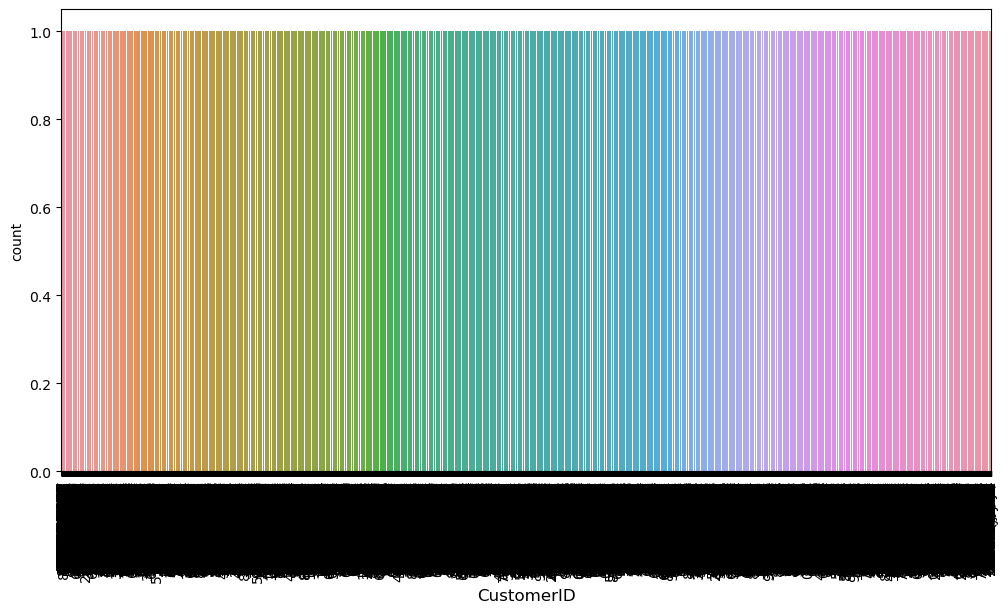

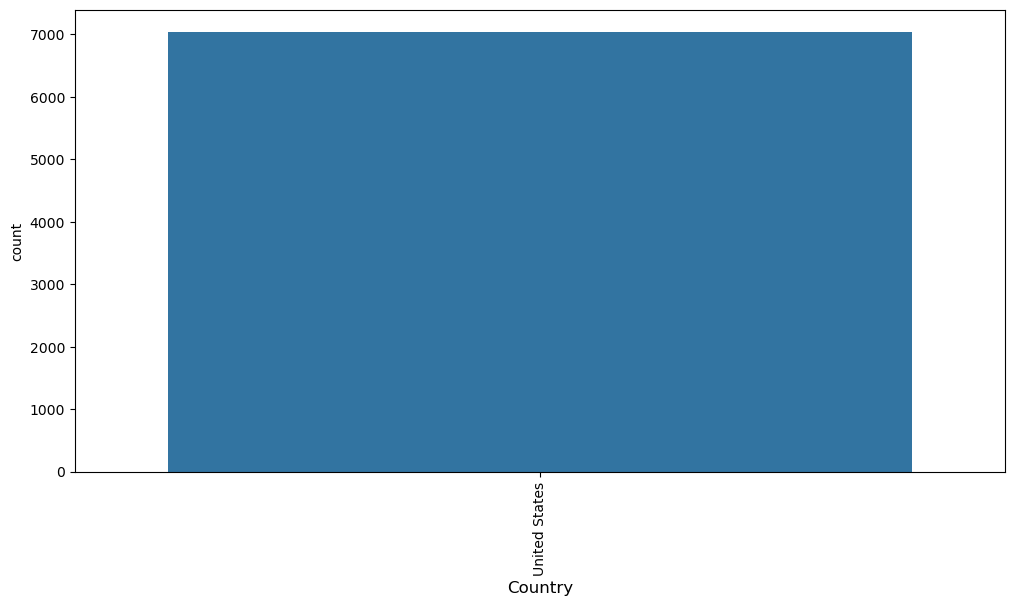

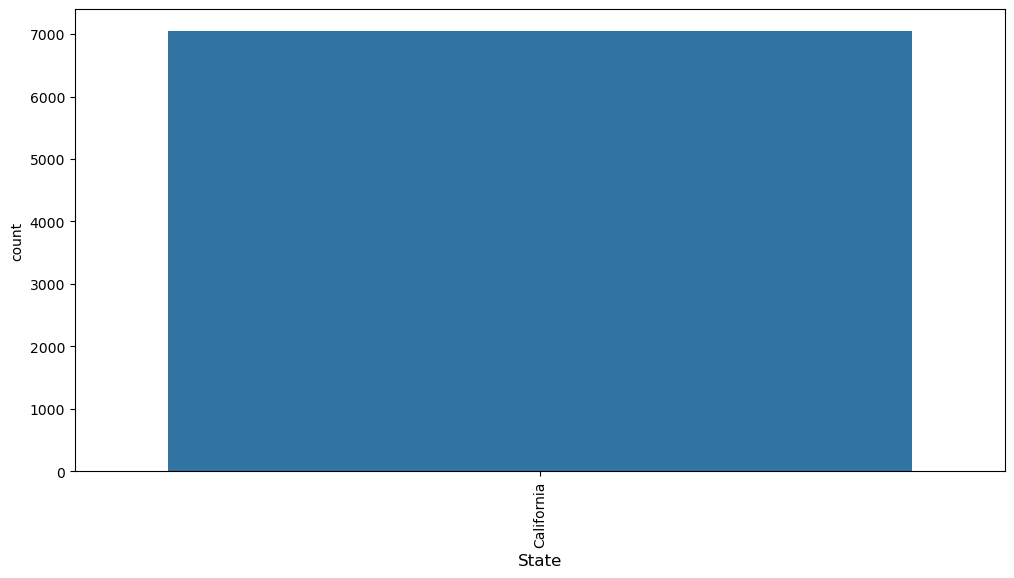

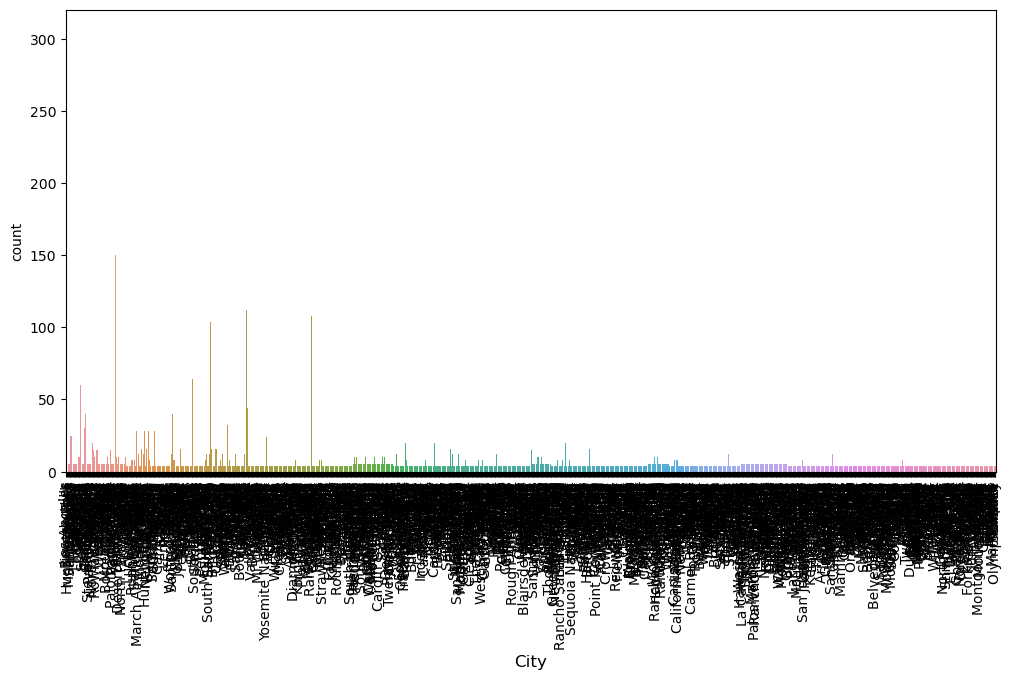

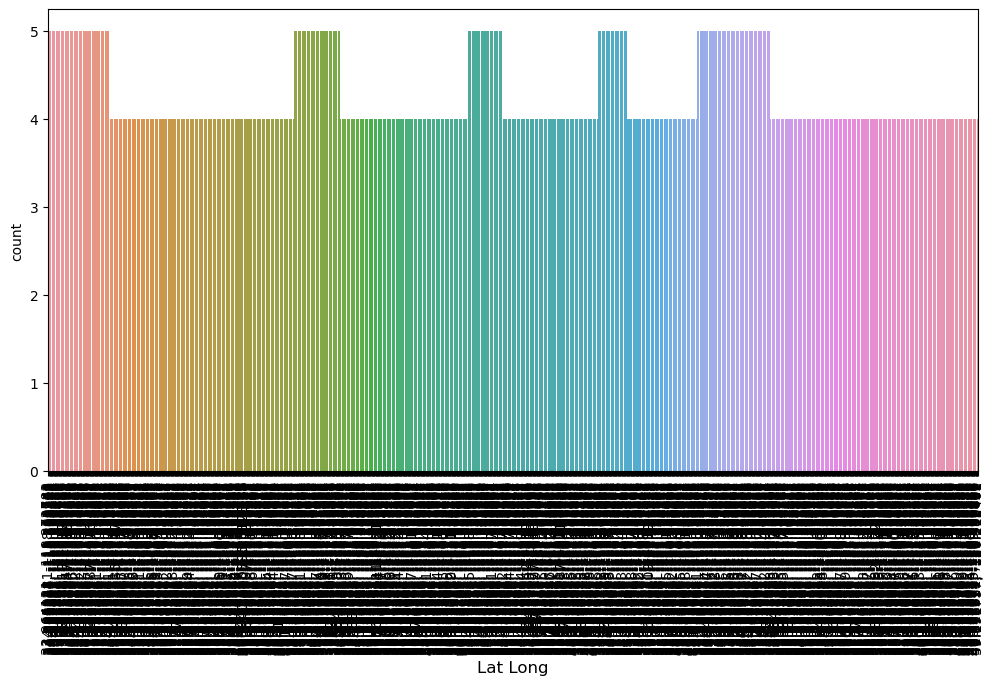

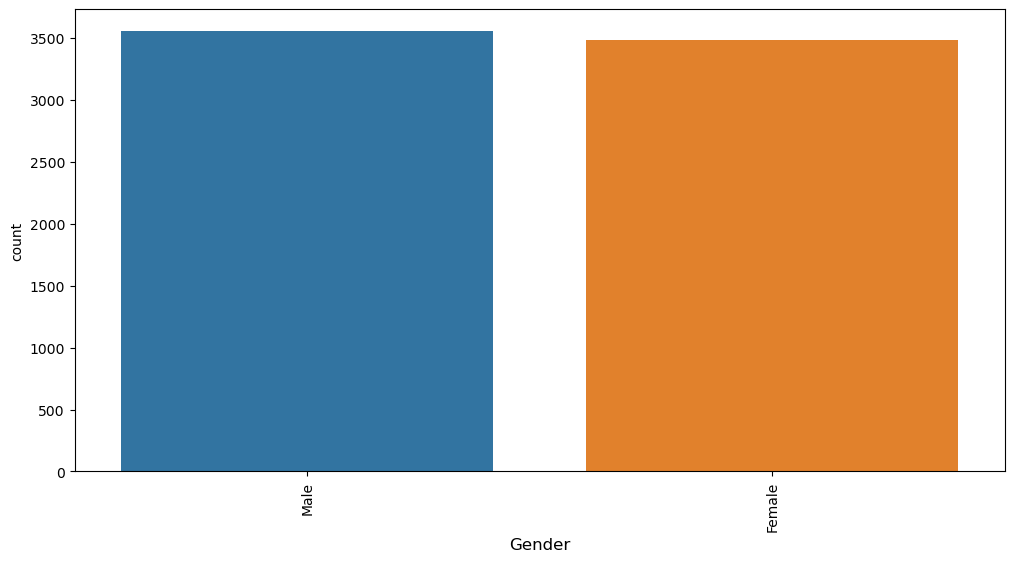

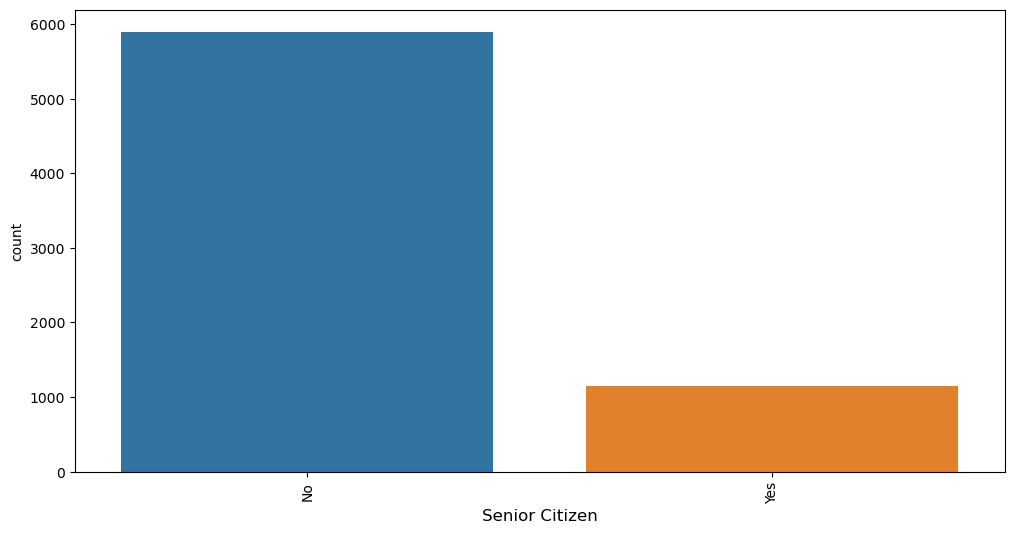

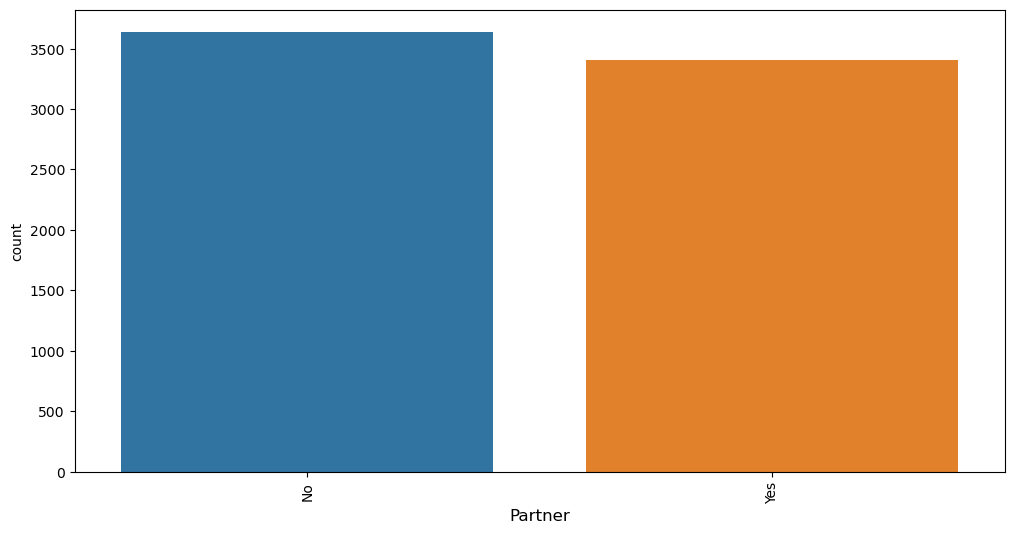

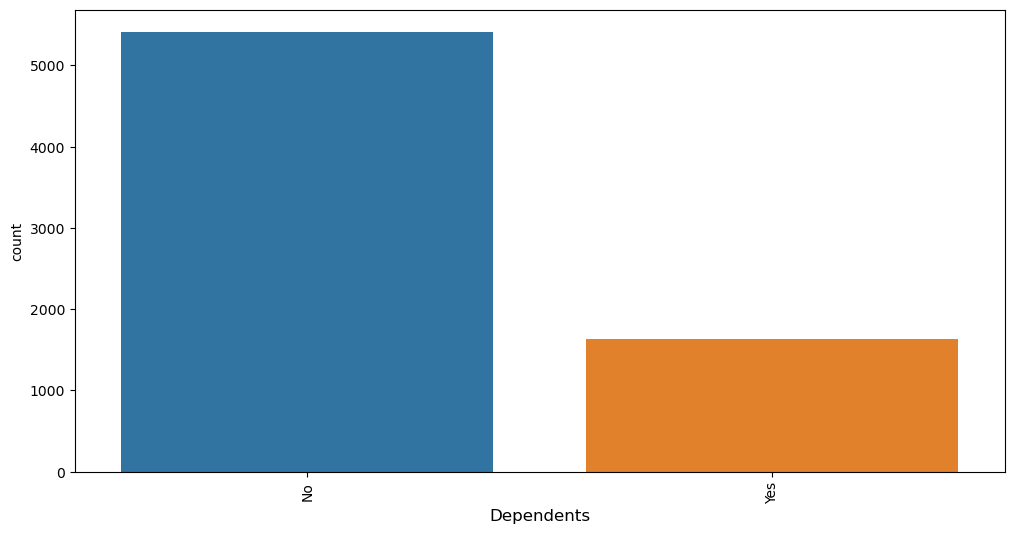

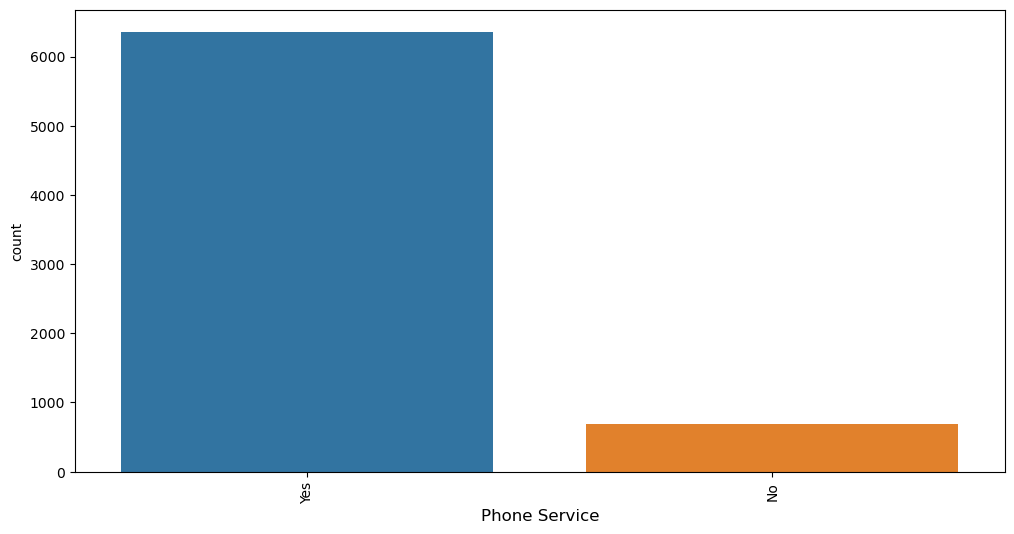

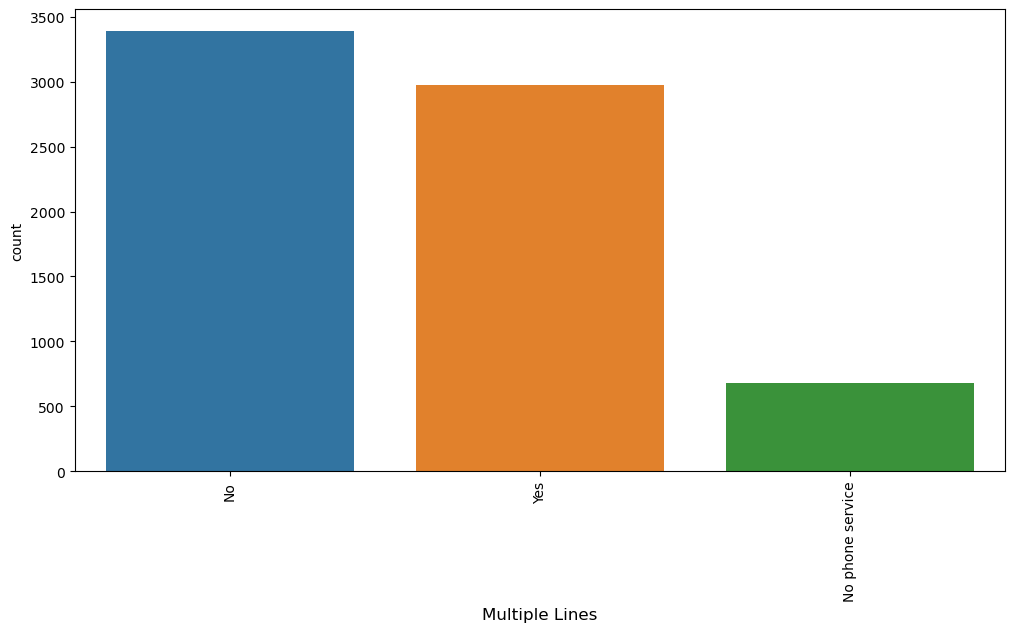

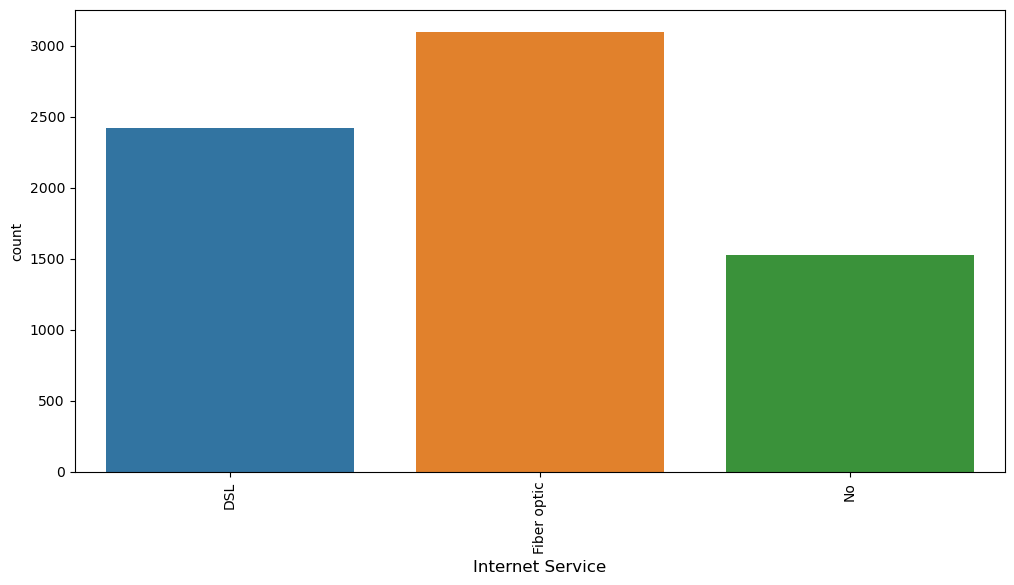

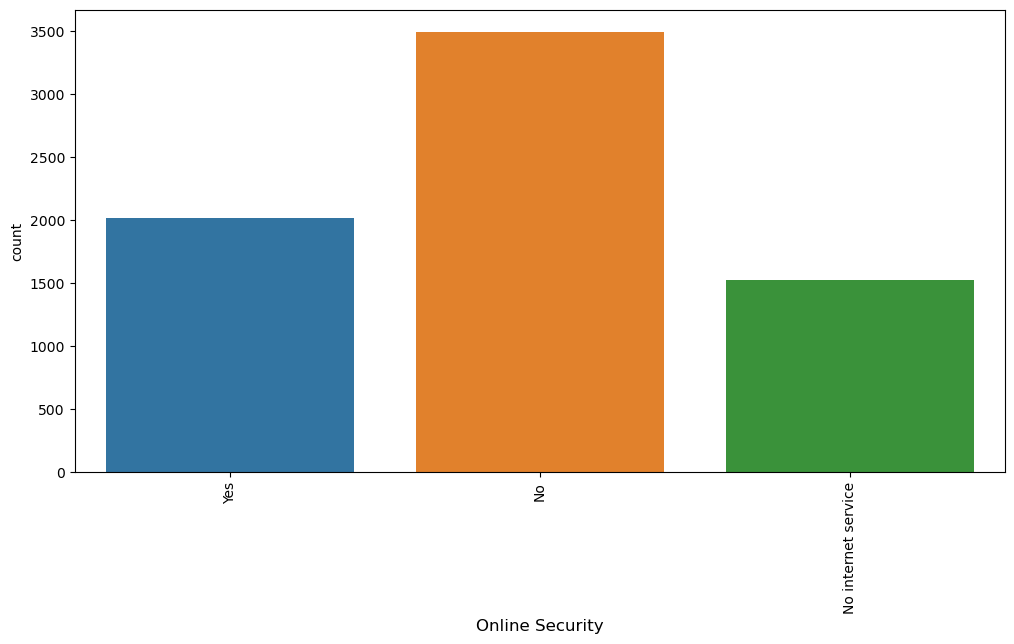

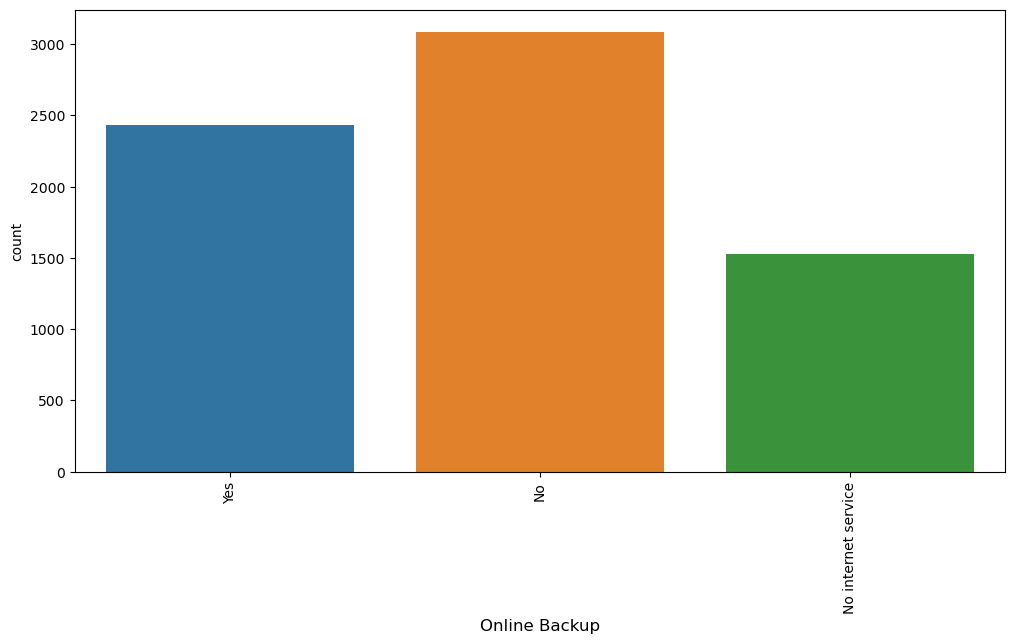

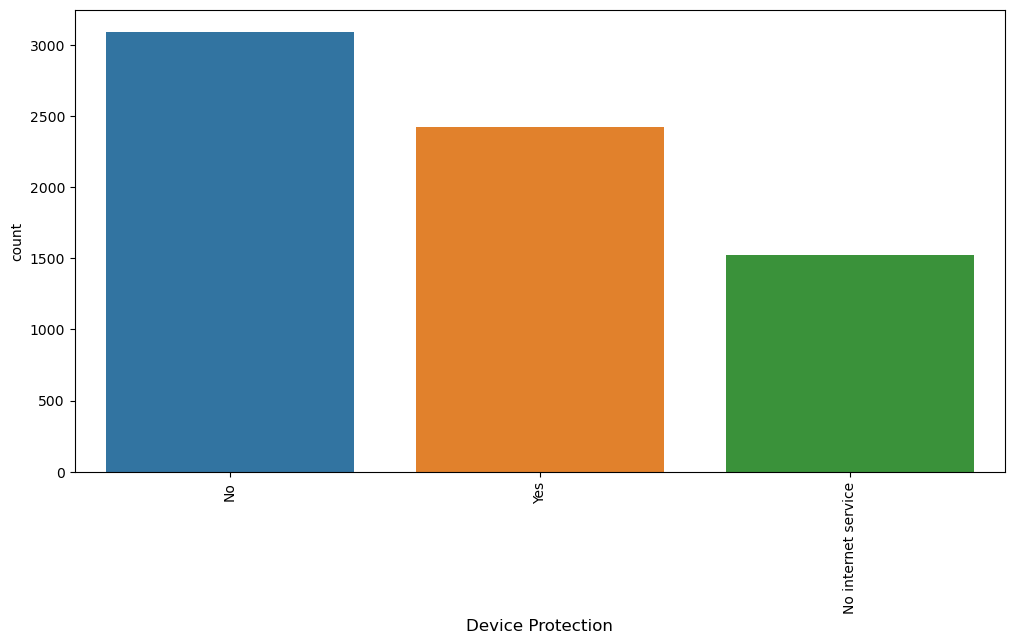

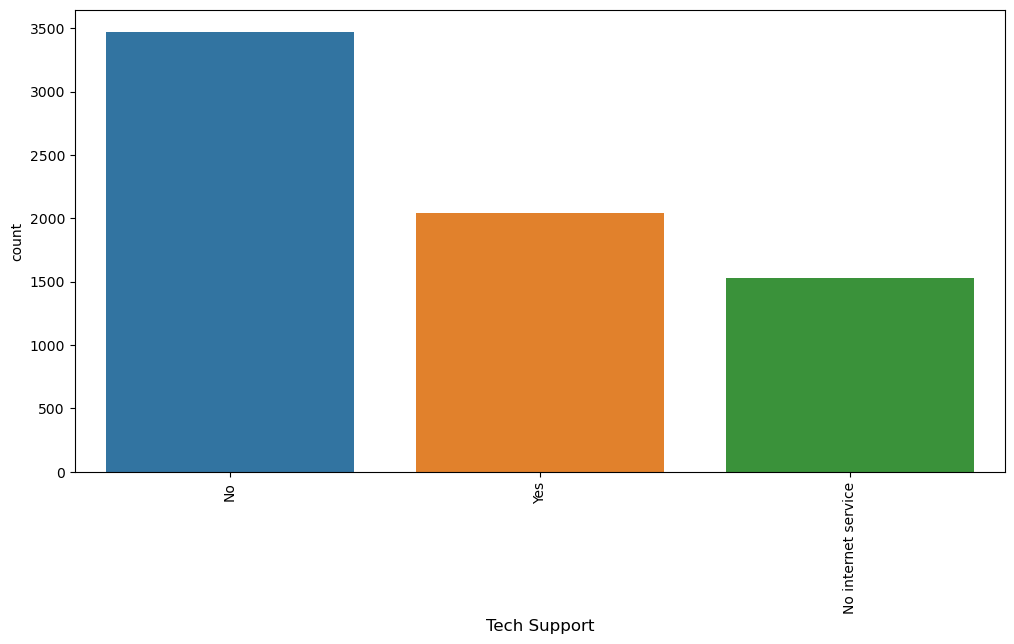

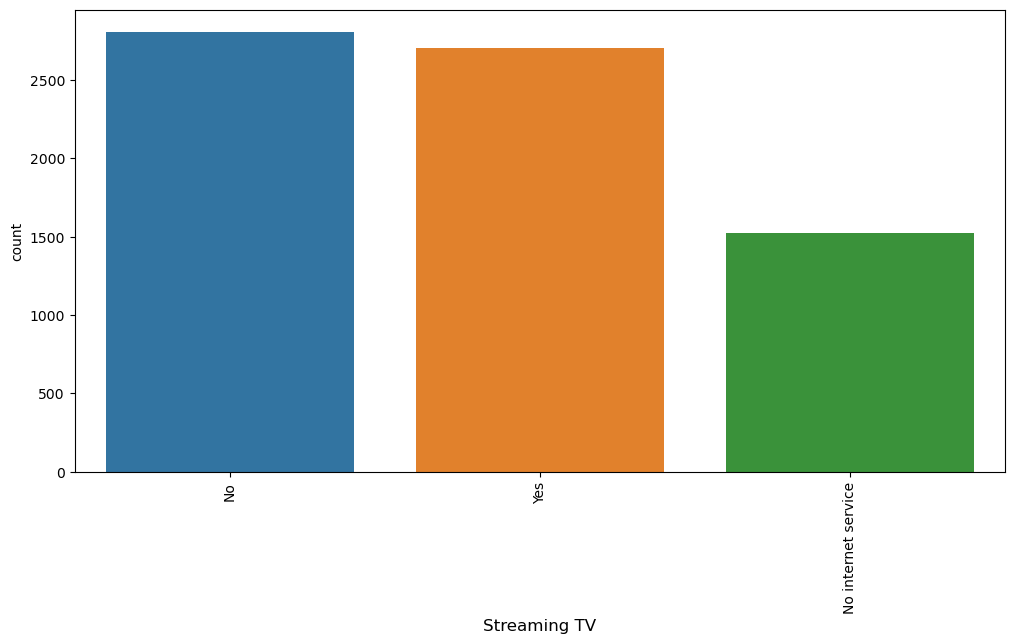

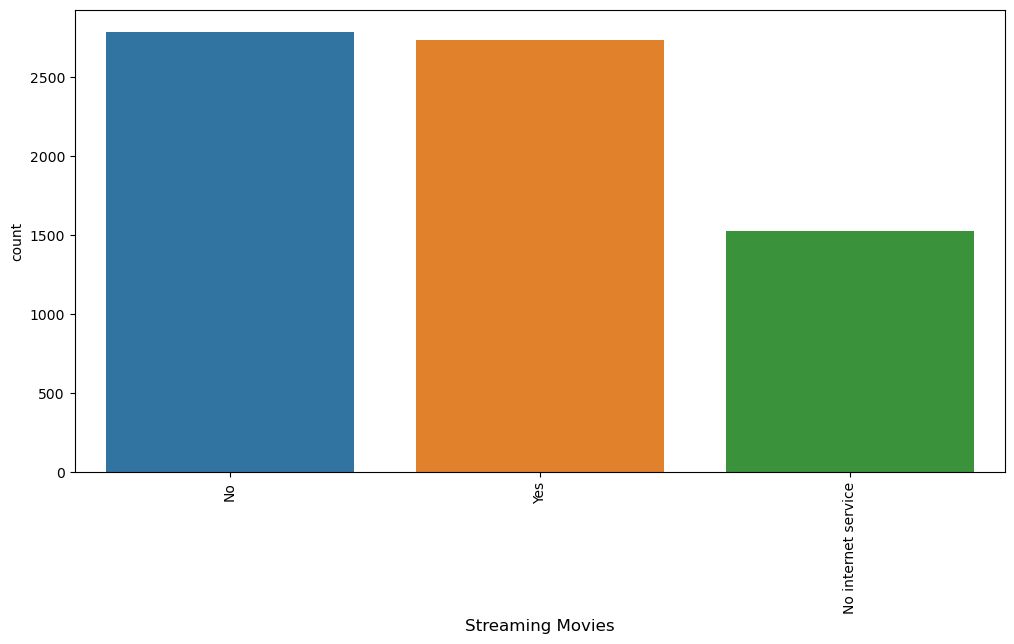

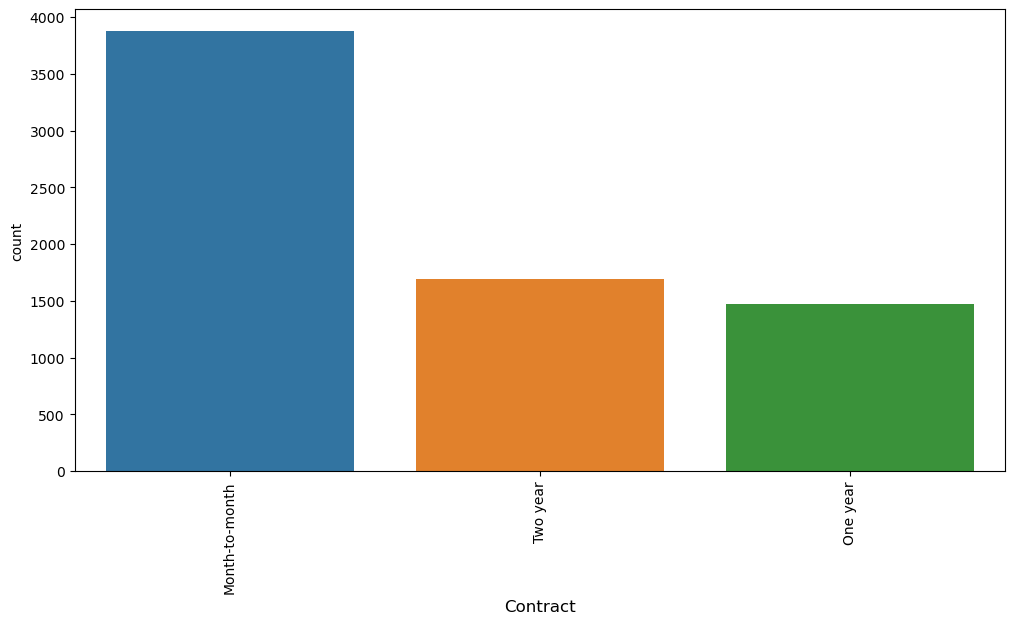

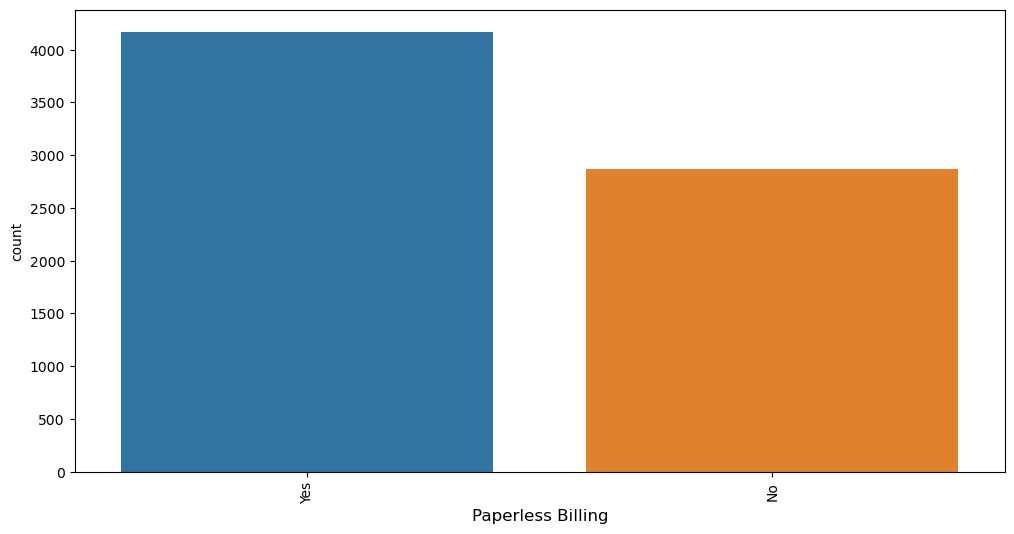

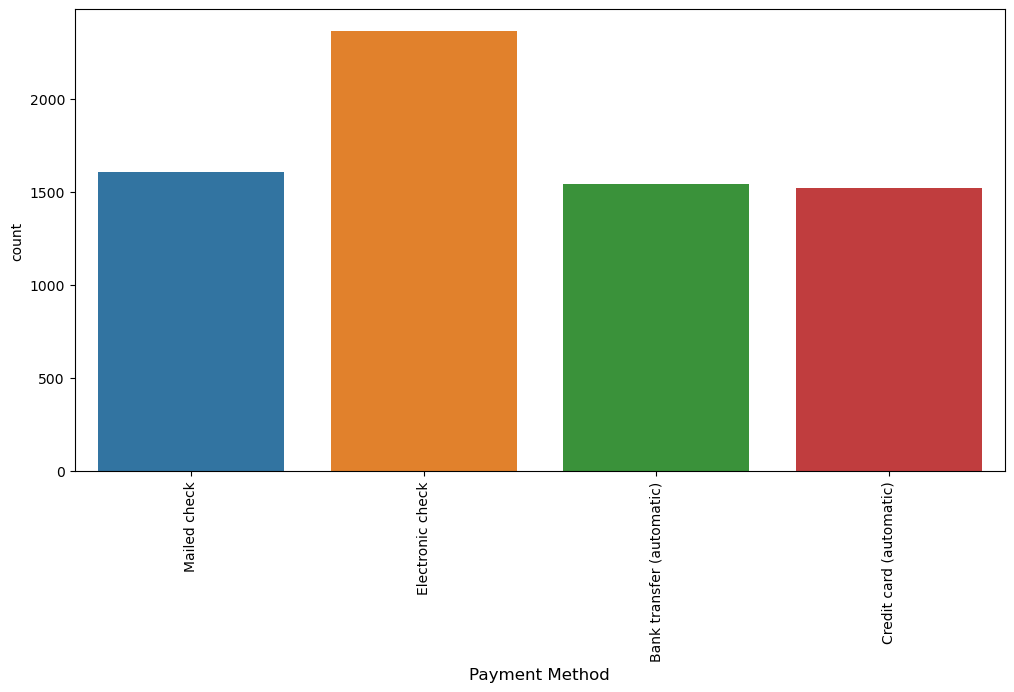

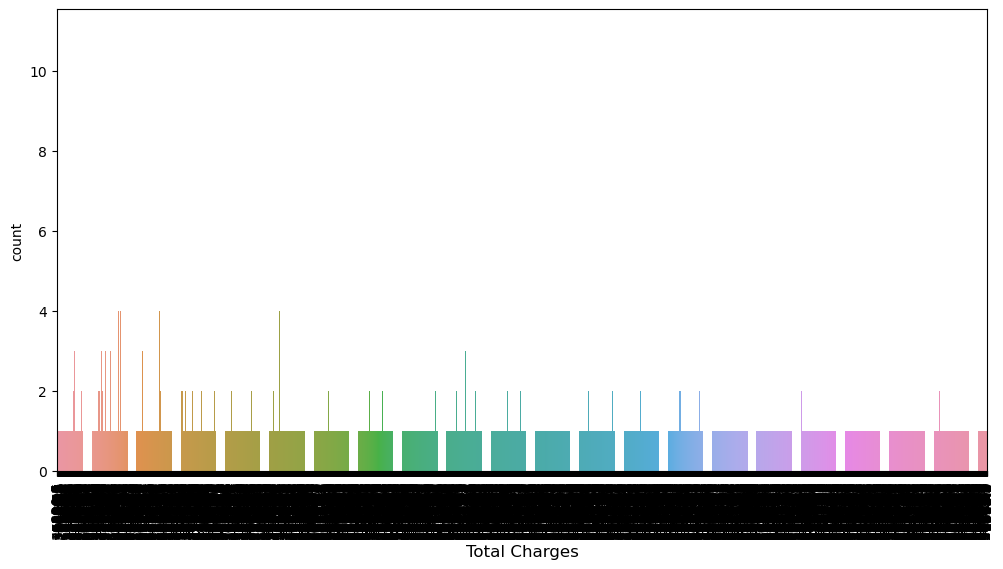

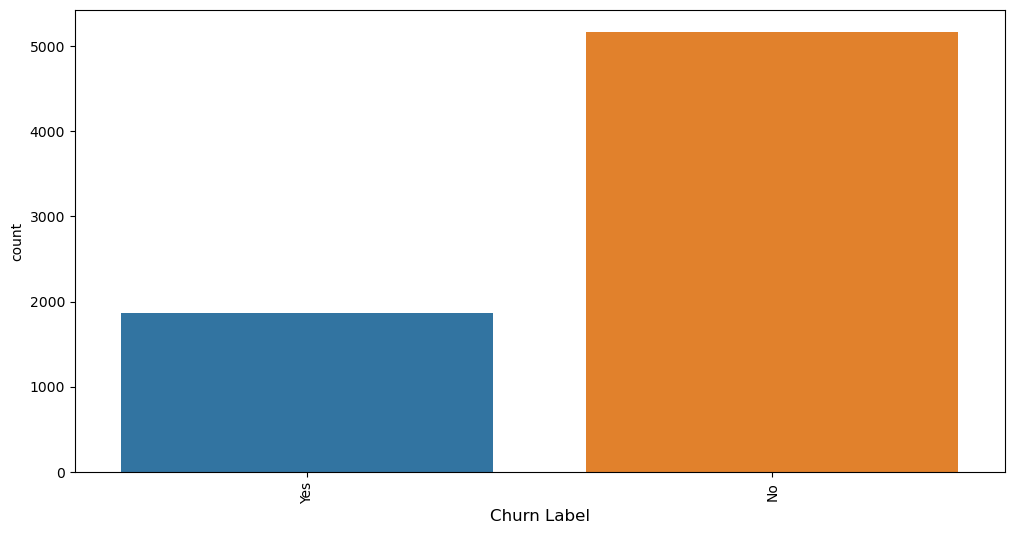

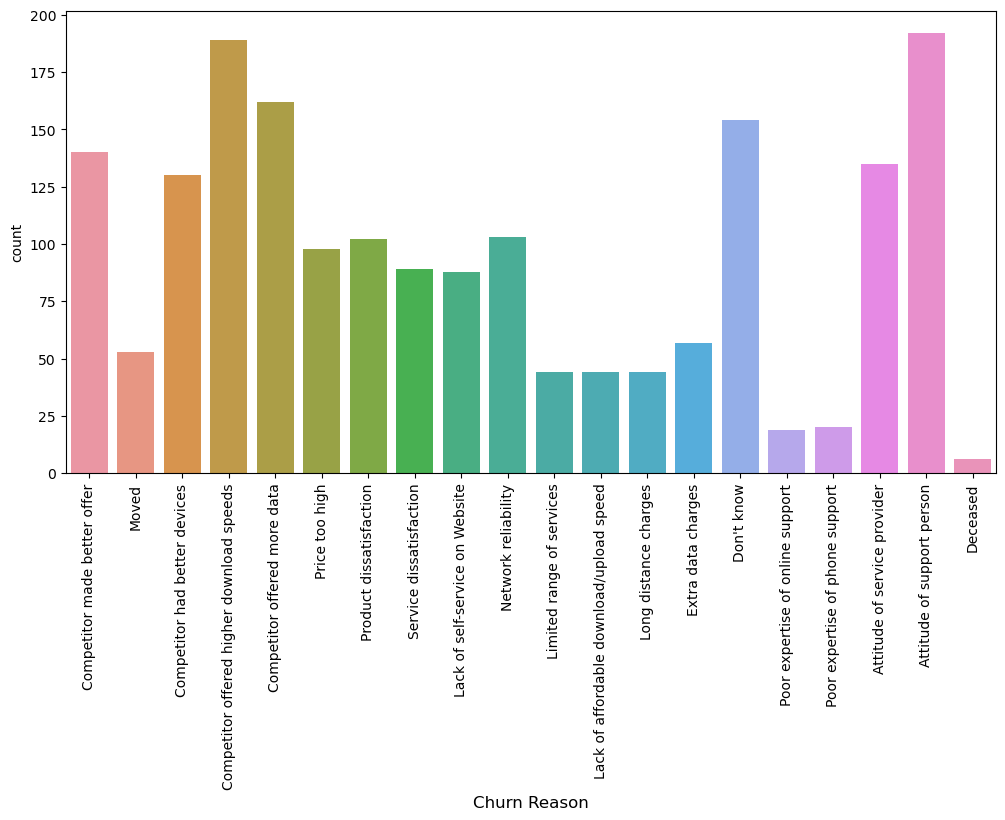

In [16]:
for column in cat_cols:
    plt.figure(figsize=(12,6))
    sns.countplot(x=column, data=df_clean)
    plt.xticks(rotation=90)
    plt.xlabel(column, fontsize=12)
    plt.show()


Dari visualisasi tersebut dapat ditarik beberapa insight dan analisa sebagai berikut:

- Gender: Jumlah pelanggan pria dan wanita seimbang, dengan pria sedikit lebih banyak.

- Senior Citizen: Jumlah pelanggan non-senior citizen (usia < 60 tahun) jauh lebih banyak daripada senior citizen (usia >= 60 tahun).

- Partner: Lebih dari separuh pelanggan memiliki pasangan.

- Dependents: Sebagian besar pelanggan tidak memiliki tanggungan.

- Phone Service: Hampir semua pelanggan memiliki layanan telepon.

- Multiple Lines: Lebih dari setengah pelanggan yang memiliki layanan telepon juga memiliki multiple lines.

- Internet Service: Sebagian besar pelanggan memiliki layanan internet, dengan mayoritas menggunakan fiber optic.

- Online Security: Lebih dari separuh pelanggan tidak menggunakan layanan online security.

- Online Backup: Lebih dari setengah pelanggan tidak menggunakan layanan online backup.

- Device Protection: Lebih dari setengah pelanggan tidak menggunakan layanan device protection.

- Tech Support: Lebih dari separuh pelanggan tidak menggunakan layanan tech support.

- Streaming TV: Lebih dari setengah pelanggan tidak menggunakan layanan streaming TV.

- Streaming Movies: Lebih dari setengah pelanggan menggunakan layanan streaming movies.

- Contract: Lebih dari setengah pelanggan memiliki kontrak berdurasi 1 atau 2 tahun.

- Paperless Billing: Hampir setengah pelanggan memilih opsi paperless billing.

- Payment Method: Mayoritas pelanggan membayar dengan electronic check.

## EDA for Modeling

Distribusi data pada kolom numerik.

In [17]:
# fungsi untuk membuat histogram dan boxplot dari sebuah fitur
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=10)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable],whis=3)
    plt.title('Boxplot')

    plt.show()

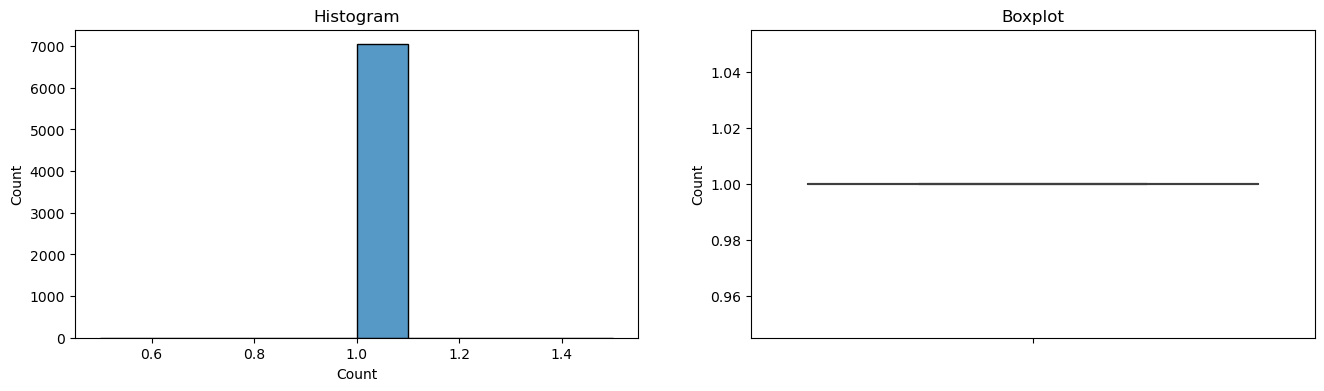


Skewness Value :  0


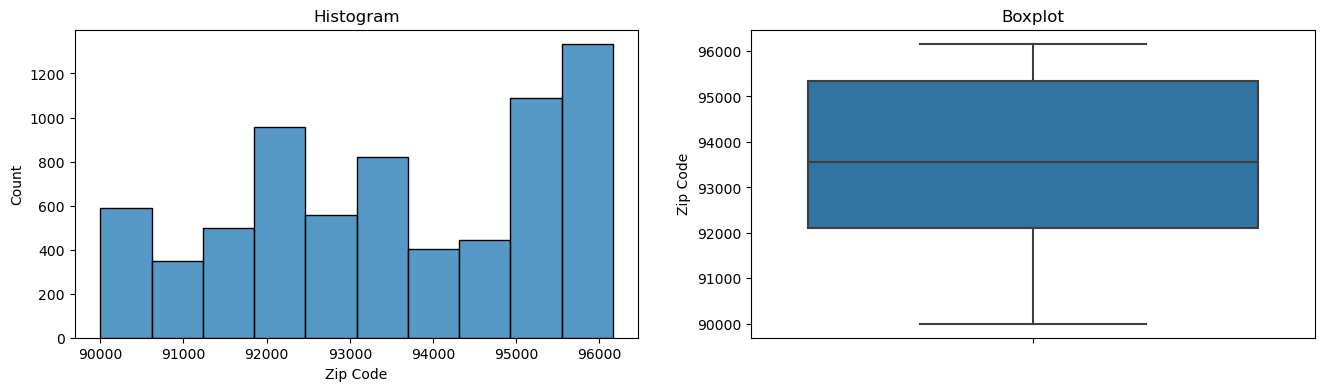


Skewness Value :  -0.2514634880437693


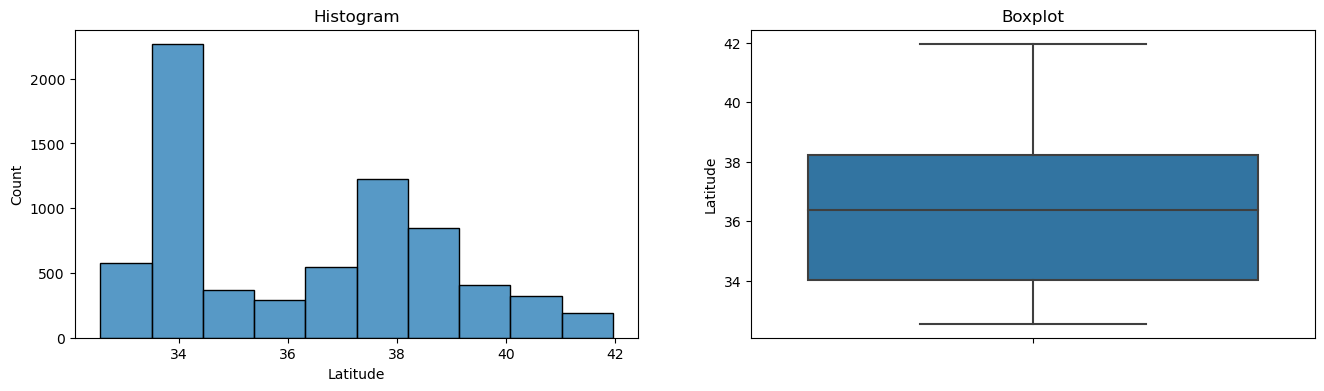


Skewness Value :  0.30386729287920206


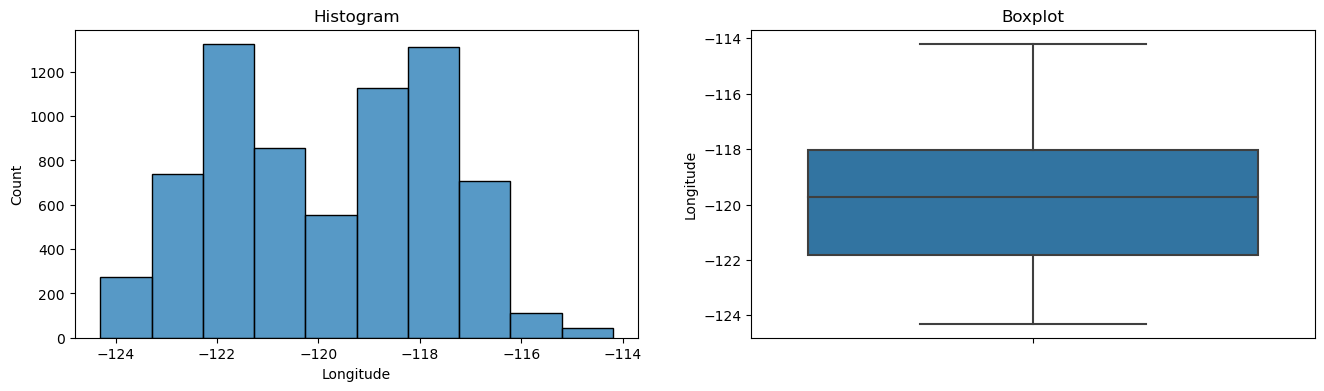


Skewness Value :  -0.04079238283753835


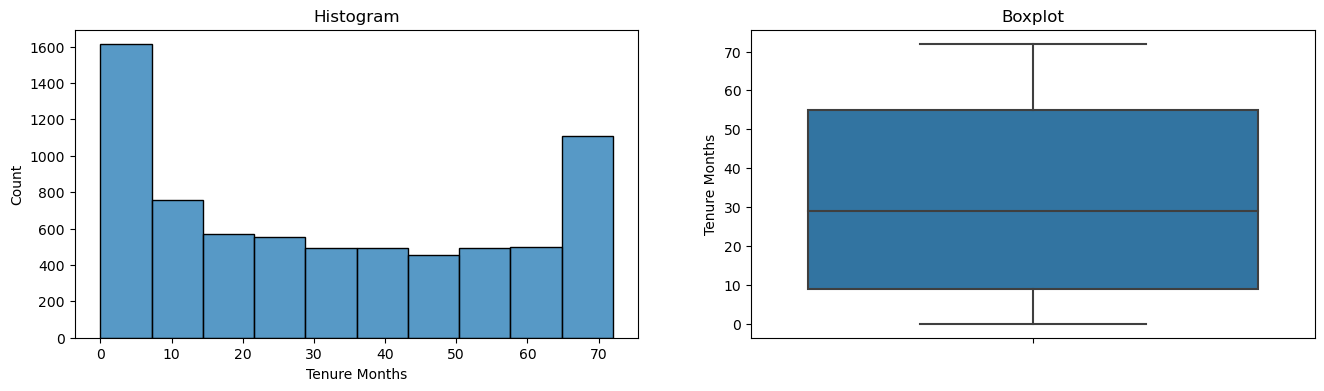


Skewness Value :  0.2395397495619829


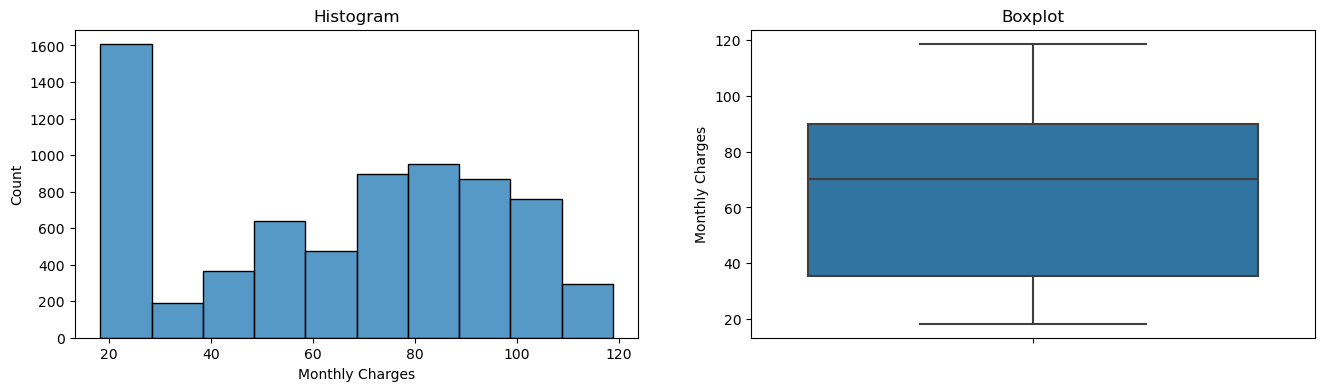


Skewness Value :  -0.22052443394398033


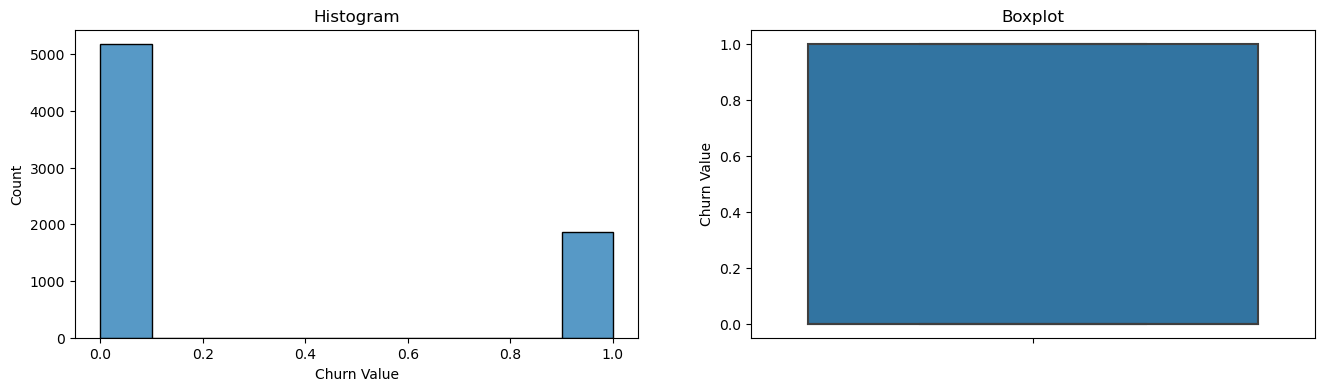


Skewness Value :  1.063031444575135


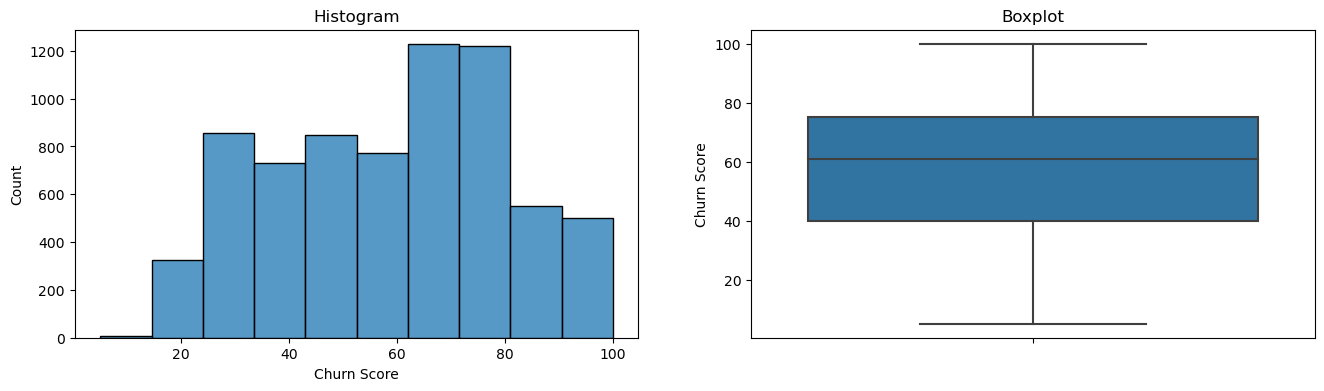


Skewness Value :  -0.08983998912005314


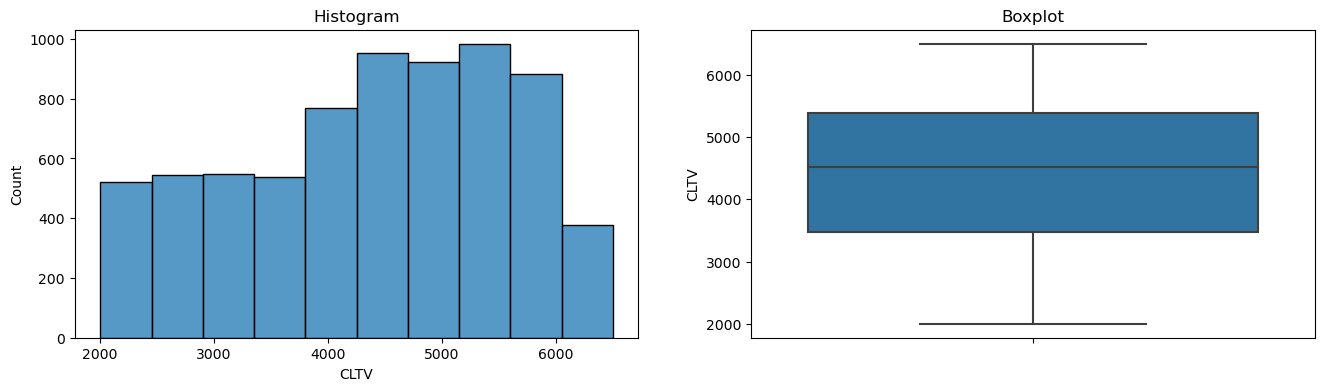


Skewness Value :  -0.3116021004049801


In [18]:
# plot histogram dan boxplot untuk melihat outlier
for col in num_cols:
    diagnostic_plots(df, col)
    print('\nSkewness Value : ', df[col].skew())

- Sekilas tampak Distribusi data pada kolom numerik dapat dikatakan normal.

In [19]:
# Deskripsi data numerik

df_clean[num_cols].describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


Dari data di atas, dapat dilihat beberapa insight dan analisis sebagai berikut:

- Terdapat 7.043 data pelanggan yang dianalisis dengan rata-rata 1 customer per data, sehingga kolom 'Count' dapat di-drop karena tidak memberikan informasi yang relevan.

- Rata-rata pelanggan berada di daerah dengan kode pos 93521, dengan latitude 36.282441 dan longitude -119.798880.

- Rata-rata lamanya pelanggan menggunakan layanan adalah selama 32.4 bulan dengan standar deviasi sebesar 24.56 bulan. Lamanya tenure ini dapat digunakan sebagai faktor penting dalam memprediksi kemungkinan pelanggan berhenti menggunakan layanan (churn).

- Rata-rata biaya bulanan yang dikeluarkan pelanggan adalah sebesar 64.76 dollar dengan standar deviasi 30.09 dollar. Biaya bulanan ini juga dapat digunakan sebagai faktor penting dalam memprediksi churn.

- Dari seluruh data pelanggan, sekitar 26.54% mengalami churn dengan rata-rata churn score sebesar 58.70 dan churn value sebesar 0.27.

- Rata-rata Customer Lifetime Value (CLTV) adalah sebesar 4400.3 dollar dengan standar deviasi sebesar 1183.1 dollar. CLTV merupakan perkiraan pendapatan yang akan dihasilkan oleh pelanggan selama menggunakan layanan perusahaan, sehingga perusahaan dapat memperhitungkan CLTV sebagai faktor penting dalam mengambil keputusan strategis terkait pemasaran dan pengelolaan pelanggan.

Dari analisis di atas, dapat disimpulkan bahwa lamanya tenure, biaya bulanan, churn score, churn value, dan CLTV merupakan faktor penting yang perlu diperhatikan dalam memprediksi churn dan mengambil keputusan strategis terkait pemasaran dan pengelolaan pelanggan.

### Explorasi Target

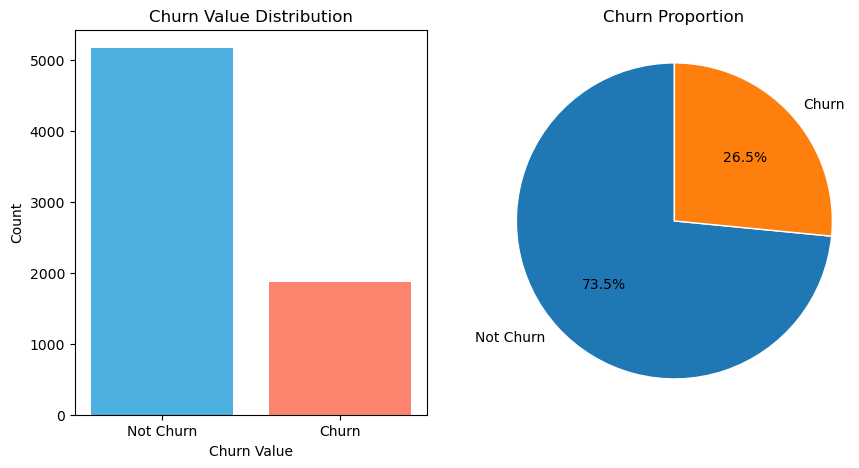

In [20]:
# Mengatur ukuran plot
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Plot histogram churn value
colors = ['#008fd5', '#fc4f30']
axs[0].bar(['Not Churn', 'Churn'], [len(df_clean[df_clean['Churn Value']==0]), len(df_clean[df_clean['Churn Value']==1])], color=colors, alpha=0.7)
axs[0].set_title('Churn Value Distribution')
axs[0].set_xlabel('Churn Value')
axs[0].set_ylabel('Count')

# Plot pie chart churn proportion
churn = df_clean['Churn Value'].value_counts()
labels = ['Not Churn', 'Churn']
colors = ['#008fd5','#fc4f30']
sns.set_palette(sns.color_palette(colors))
axs[1].pie(churn, labels=labels, autopct='%1.1f%%', startangle=90, wedgeprops={"edgecolor":"white", 'linewidth': 1})
axs[1].set_title('Churn Proportion')
axs[1].axis('equal')

plt.show()



- Dari visualisasi pie chart di atas, dapat dilihat bahwa proporsi pelanggan yang churn (mengakhiri langganan) adalah sebesar 26,5% dan pelanggan yang tidak churn sebesar 73,5%. Dari visualisasi ini, dapat diambil kesimpulan bahwa perusahaan perlu melakukan tindakan untuk mengurangi churn pelanggan agar dapat mempertahankan basis pelanggannya.

-  Dari visualisasi bar chart menunjukkan jumlah pelanggan yang churn berdasarkan jenis kontrak. Dari visualisasi ini dapat dilihat bahwa jumlah pelanggan yang churn paling banyak terjadi pada jenis kontrak bulanan (month-to-month) dan paling sedikit pada kontrak dua tahunan (two year contract). Ini menunjukkan bahwa pelanggan dengan jenis kontrak bulanan lebih cenderung untuk beralih ke penyedia layanan lain, yang mengakibatkan churn. Perusahaan dapat mempertimbangkan untuk menawarkan insentif atau mengevaluasi kembali penawaran produk dan layanan pada jenis kontrak bulanan untuk mempertahankan basis pelanggannya.

- Selanjutnya, visualisasi tersebut menunjukkan bahwa data tidak seimbang (imbalanced data). Kondisi ini dapat mempengaruhi kinerja model machine learning yang akan digunakan untuk memprediksi churn, karena model cenderung cenderung lebih baik dalam memprediksi kelas mayoritas daripada kelas minoritas. ditahap selanjutnya akan kita handle imbalance ini.

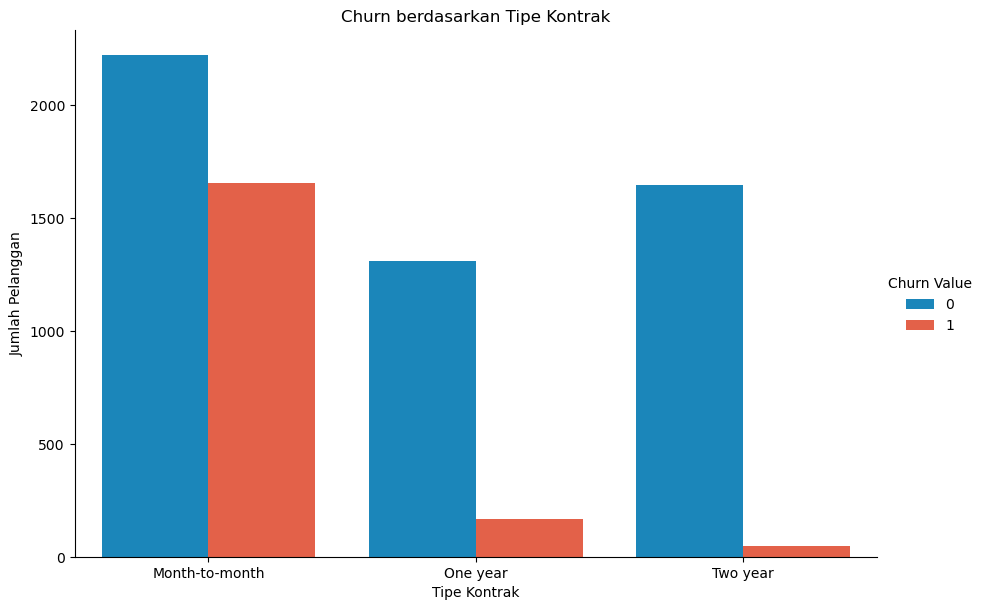

In [21]:
# Mengelompokkan data berdasarkan tipe kontrak dan nilai churn
churn_by_contract = df_clean.groupby(['Contract', 'Churn Value']).size().reset_index(name='jumlah')

# Membuat plot batang
sns.catplot(x='Contract', y='jumlah', hue='Churn Value', data=churn_by_contract, kind='bar', height=6, aspect=1.5, palette=sns.color_palette(['#008fd5', '#fc4f30']))

# Menetapkan judul plot, label sumbu x, dan label sumbu y
plt.title('Churn berdasarkan Tipe Kontrak')
plt.xlabel('Tipe Kontrak')
plt.ylabel('Jumlah Pelanggan')

# Menampilkan plot
plt.show()



- Dari plot di atas, terlihat bahwa jumlah pelanggan yang churn lebih tinggi pada jenis kontrak bulanan dan lebih rendah pada jenis kontrak dua tahunan. Kontrak bulanan memiliki jumlah pelanggan yang churn lebih dari dua kali lipat dari kontrak tahunan dan hampir tiga kali lipat dari kontrak dua tahunan.

- Hal ini menunjukkan bahwa kontrak bulanan mungkin tidak cukup menarik bagi pelanggan atau mungkin terlalu mahal dibandingkan dengan kontrak tahunan atau dua tahunan. Dalam hal ini, perusahaan dapat mempertimbangkan untuk menawarkan insentif atau diskon pada pelanggan yang berlangganan kontrak bulanan untuk mengurangi tingkat churn.

- Di sisi lain, kontrak dua tahunan memiliki tingkat churn yang paling rendah, yang menunjukkan bahwa pelanggan cenderung lebih stabil dengan kontrak jangka panjang. Oleh karena itu, perusahaan dapat mempertimbangkan untuk memperkenalkan lebih banyak pilihan kontrak jangka panjang untuk menarik lebih banyak pelanggan yang ingin tetap berlangganan dalam jangka waktu yang lebih lama.

# VI. Feature Engineering

## Feature Selection

Sebelum melakukan feature selection pada data untuk model klasifikasi, perlu dipertimbangkan kolom-kolom mana yang tidak relevan atau tidak penting dalam memprediksi churn. Kolom-kolom tersebut dapat di-drop untuk mengurangi dimensi data dan mempermudah proses pemodelan.

Beberapa kolom yang mungkin perlu di-drop sebelum feature selection antara lain:

- CustomerID: Kolom ini berisi identitas pelanggan dan tidak relevan dalam memprediksi churn. Oleh karena itu, kolom ini dapat di-drop.

- Count: Kolom ini berisi jumlah transaksi pelanggan dan tidak relevan dalam memprediksi churn. Oleh karena itu, kolom ini dapat di-drop.

- State, City, dan Zip Code: Kolom-kolom ini berisi informasi geografis dan mungkin tidak memiliki pengaruh yang signifikan dalam memprediksi churn. Oleh karena itu, kolom-kolom ini dapat di-drop.

- Lat Long, Latitude, dan Longitude: Kolom-kolom ini berisi informasi geografis yang redundan dengan kolom State, City, dan Zip Code. Oleh karena itu, kolom-kolom ini dapat di-drop.

- Churn Label: Kolom ini berisi label churn dan dapat di-drop karena tidak diperlukan dalam proses pemodelan.

- Churn Reason: Kolom ini berisi alasan pelanggan churn dan tidak relevan dalam memprediksi churn secara umum. Oleh karena itu, kolom ini dapat di-drop. 

In [22]:
df_clean.head(3) #overview data

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved


In [23]:
# Drop kolom yang tidak relevan
df_clean = df_clean.drop(['CustomerID', 'Count', 'State', 'City', 'Zip Code', 'Lat Long', 'Latitude', 'Longitude', 'Churn Label', 'Churn Reason'], axis=1)

# Reset index
df_clean = df_clean.reset_index(drop=True)

# Tampilkan 5 baris pertama data setelah drop kolom dan reset index
print(df_clean.head())

         Country  Gender Senior Citizen Partner Dependents  Tenure Months  \
0  United States    Male             No      No         No              2   
1  United States  Female             No      No        Yes              2   
2  United States  Female             No      No        Yes              8   
3  United States  Female             No     Yes        Yes             28   
4  United States    Male             No      No        Yes             49   

  Phone Service Multiple Lines Internet Service Online Security  ...  \
0           Yes             No              DSL             Yes  ...   
1           Yes             No      Fiber optic              No  ...   
2           Yes            Yes      Fiber optic              No  ...   
3           Yes            Yes      Fiber optic              No  ...   
4           Yes            Yes      Fiber optic              No  ...   

  Streaming TV Streaming Movies        Contract Paperless Billing  \
0           No               No  Mo

In [24]:
df_clean.columns # kolom (after drop column)

Index(['Country', 'Gender', 'Senior Citizen', 'Partner', 'Dependents',
       'Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Value',
       'Churn Score', 'CLTV'],
      dtype='object')

In [25]:
df_clean.isnull().sum() # memeriksa missing value pada data clean (after drop column)

Country              0
Gender               0
Senior Citizen       0
Partner              0
Dependents           0
Tenure Months        0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn Value          0
Churn Score          0
CLTV                 0
dtype: int64

#### Phi_K Correlation Test

Disini kami menggunakan Phi_K Correlation Test karena cocok digunakan dalam seleksi fitur dengan target default_payment_next_month adalah karena target tersebut merupakan variabel diskrit dengan dua nilai, yaitu 0 dan 1.

interval columns not set, guessing: ['Tenure Months', 'Monthly Charges', 'Churn Value', 'Churn Score', 'CLTV']


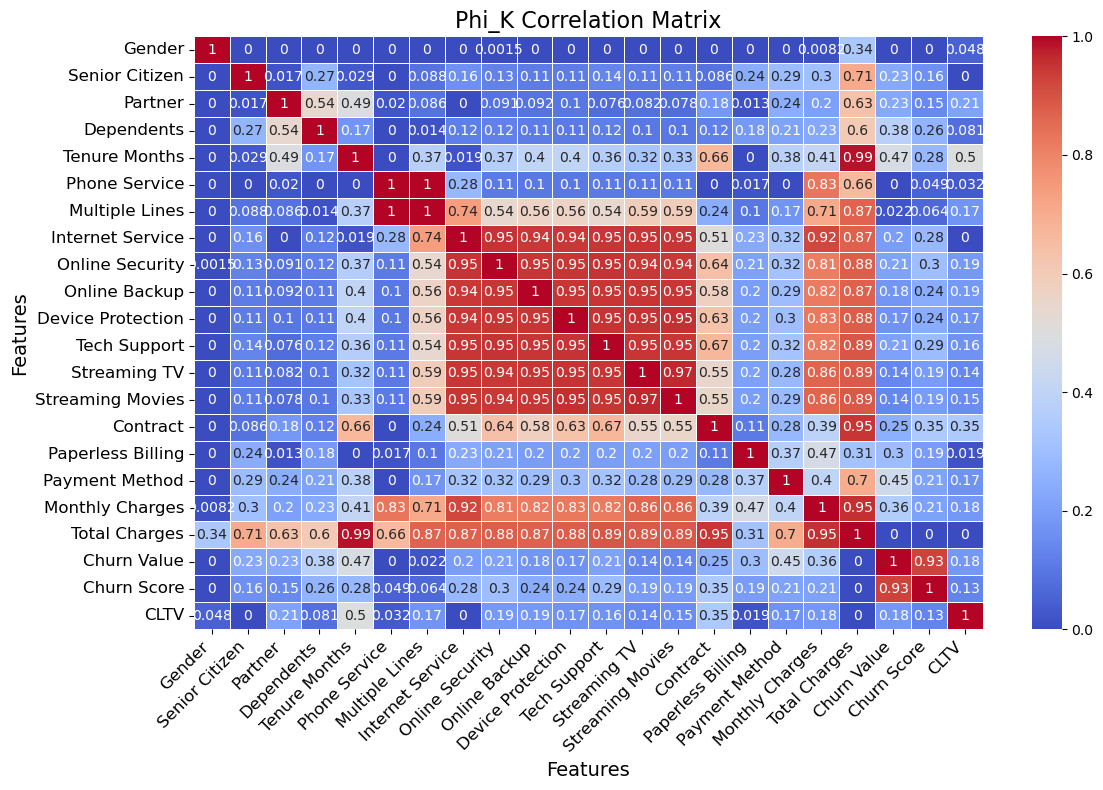

In [26]:
# Menghitung matriks phik
phik_matrix = df_clean.phik_matrix()

# plot the correlation matrix using seaborn heatmap
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(phik_matrix, annot=True, cmap='coolwarm', linewidths=0.5, ax=ax)

# set the title and axis labels
plt.title("Phi_K Correlation Matrix", fontsize=16)
plt.xlabel("Features", fontsize=14)
plt.ylabel("Features", fontsize=14)

# rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# display the plot
plt.tight_layout()
plt.show()

In [27]:
# cek korelasi yang memiliki signifikansi terhadap income_bracket
df_clean.phik_matrix()["Churn Value"].sort_values(ascending=False)

interval columns not set, guessing: ['Tenure Months', 'Monthly Charges', 'Churn Value', 'Churn Score', 'CLTV']


Churn Value          1.000000
Churn Score          0.926530
Tenure Months        0.474001
Payment Method       0.449125
Dependents           0.379624
Monthly Charges      0.360050
Paperless Billing    0.295754
Contract             0.251639
Senior Citizen       0.233432
Partner              0.232930
Online Security      0.211840
Tech Support         0.209021
Internet Service     0.196202
CLTV                 0.182904
Online Backup        0.177422
Device Protection    0.170762
Streaming Movies     0.139522
Streaming TV         0.139246
Multiple Lines       0.021922
Total Charges        0.000000
Phone Service        0.000000
Gender               0.000000
Name: Churn Value, dtype: float64

Dari output tersebut, terlihat bahwa 

- kolom "Churn Score" memiliki korelasi tertinggi dengan "Churn Value" sebesar 0.926530. Hal ini menunjukkan bahwa "Churn Score" adalah faktor yang paling kuat mempengaruhi apakah seorang pelanggan akan churn atau tidak.

- Selain itu, kolom "Tenure Months" dan "Payment Method" juga memiliki korelasi yang cukup tinggi dengan "Churn Value" masing-masing sebesar 0.474001 dan 0.449125, yang menunjukkan bahwa lamanya masa berlangganan dan metode pembayaran juga dapat mempengaruhi keputusan pelanggan untuk churn atau tidak.

- Sedangkan kolom "Gender", "Phone Service", dan "Total Charges" tidak memiliki korelasi yang signifikan dengan "Churn Value", yang berarti bahwa faktor-faktor tersebut tidak begitu mempengaruhi keputusan pelanggan untuk churn atau tidak.

Berdasarkan paparan data hasil PHIK Corelation kami memmutuskan mengambil 5 besar variable yang mempunyai korelasi kuat, yaitu 'Churn Score', 'Tenure Months', 'Payment Method', 'Dependents', 'Monthly Charges', 'Churn Value'.

In [28]:
df_selected = df_clean[['Churn Score', 'Tenure Months', 'Payment Method', 'Dependents', 'Monthly Charges', 'Churn Value']]
df_selected.head()

,Churn Score,Tenure Months,Payment Method,Dependents,Monthly Charges,Churn Value
0,86,2,Mailed check,No,53.85,1
1,67,2,Electronic check,Yes,70.70,1
2,86,8,Electronic check,Yes,99.65,1
3,84,28,Electronic check,Yes,104.80,1
4,89,49,Bank transfer (automatic),Yes,103.70,1


Selanjutnya kita akan memeriksa tingkat Cardinality dari data yang kita punya.

## Handling Cardinality 

In [29]:
#  menampilkan jumlah label unik dari kolom-kolom yang bertipe numerik pada DataFrame 'df_selected'
df_selected.select_dtypes(include='number').nunique()

Churn Score          85
Tenure Months        73
Monthly Charges    1585
Churn Value           2
dtype: int64

In [30]:
df_selected.columns

Index(['Churn Score', 'Tenure Months', 'Payment Method', 'Dependents',
       'Monthly Charges', 'Churn Value'],
      dtype='object')

In [31]:
# menampilkan semua nilai unik dari beberapa kolom pada DataFrame 'df_selected'
kolom = ['Churn Score', 'Tenure Months', 'Payment Method', 'Dependents', 'Monthly Charges']
for k in kolom:
    print(k + ':', df_selected[k].unique())


Churn Score: [ 86  67  84  89  78 100  92  77  97  74  66  65  70  90  82  69  81  96
  87  88  75  76  95  99  80  73  94  83  98  71  85  68  91  93  72  79
  27  61  43  51  58  39  35  57  53  21  38  40  41  22  25  64  49  62
  52  59  29  33  20  30  26  54  56  55  28  37   9  60  24  63  23  47
  32   8  46  42  48  36  34   7  50  44  31   5  45]
Tenure Months: [ 2  8 28 49 10  1 47 17  5 34 11 15 18  9  7 12 25 68 55 37  3 27 20  4
 58 53 13  6 19 59 16 52 24 32 38 54 43 63 21 69 22 61 60 48 40 23 39 35
 56 65 33 30 45 46 62 70 50 44 71 26 14 41 66 64 29 42 67 51 31 57 36 72
  0]
Payment Method: ['Mailed check' 'Electronic check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Dependents: ['No' 'Yes']
Monthly Charges: [ 53.85  70.7   99.65 ... 108.35  63.1   78.7 ]


- Dari sisi cardinality, beberapa kolom memiliki cardinality yang tinggi dan beberapa yang rendah. Kolom dengan cardinality tinggi yaitu 'Churn Score', 'Tenure Months', dan 'Monthly Charges', sedangkan kolom 'Churn Value' dan 'Dependents' memiliki cardinality yang rendah.

In [32]:
df_selected.head(3)

,Churn Score,Tenure Months,Payment Method,Dependents,Monthly Charges,Churn Value
0,86,2,Mailed check,No,53.85,1
1,67,2,Electronic check,Yes,70.70,1
2,86,8,Electronic check,Yes,99.65,1


In [33]:
# Menghitung jumlah kemunculan setiap nilai unik pada kolom Churn Score
churn_score_counts = df_selected['Churn Score'].value_counts().to_frame().reset_index()
churn_score_counts.columns = ['Churn Score', 'count']
print("Value counts in Churn Score column:\n", churn_score_counts)

# Menghitung jumlah kemunculan setiap nilai unik pada kolom Tenure Months
tenure_months_counts = df_selected['Tenure Months'].value_counts().to_frame().reset_index()
tenure_months_counts.columns = ['Tenure Months', 'count']
print("Value counts in Tenure Months column:\n", tenure_months_counts)

# Menghitung jumlah kemunculan setiap nilai unik pada kolom Monthly Charges
monthly_charges_counts = df_selected['Monthly Charges'].value_counts().to_frame().reset_index()
monthly_charges_counts.columns = ['Monthly Charges', 'count']
print("Value counts in Monthly Charges column:\n", monthly_charges_counts)


Value counts in Churn Score column:
     Churn Score  count
0            80    151
1            71    148
2            77    145
3            67    143
4            76    141
..          ...    ...
80           88     33
81            9      3
82            8      2
83            7      2
84            5      1

[85 rows x 2 columns]
Value counts in Tenure Months column:
     Tenure Months  count
0               1    613
1              72    362
2               2    238
3               3    200
4               4    176
..            ...    ...
68             28     57
69             39     56
70             44     51
71             36     50
72              0     11

[73 rows x 2 columns]
Value counts in Monthly Charges column:
       Monthly Charges  count
0               20.05     61
1               19.85     45
2               19.95     44
3               19.90     44
4               19.65     43
...               ...    ...
1580           112.55      1
1581           117.15      1


Dari analisis value counts pada ketiga kolom tersebut, dapat dilihat bahwa:

- Kolom Churn Score memiliki 85 nilai unik dengan rentang nilai antara 1 hingga 100. Nilai yang paling sering muncul adalah 80 dengan jumlah kemunculan 151.

- Kolom Tenure Months memiliki 73 nilai unik dengan rentang nilai antara 0 hingga 72. Nilai yang paling sering muncul adalah 1 dengan jumlah kemunculan 613.

- Kolom Monthly Charges memiliki 1585 nilai unik dengan rentang nilai antara 18.40 hingga 118.65. Tidak ada nilai yang secara signifikan paling sering muncul.

In [34]:
print(df_selected.dtypes) # check data type


Churn Score          int64
Tenure Months        int64
Payment Method      object
Dependents          object
Monthly Charges    float64
Churn Value          int64
dtype: object


Mengubah kolom Monthly Charges menjadi variabel kategorikal dengan membuat 3 kategori berdasarkan range nilai

In [35]:
# Convert Monthly Charges to float
df_selected['Monthly Charges'] = df_selected['Monthly Charges'].astype(float)

# Membuat range nilai untuk setiap kategori
low_range = (df_selected['Monthly Charges'].min(), 30)
mid_range = (30, 70)
high_range = (70, df_selected['Monthly Charges'].max())

# Membuat fungsi untuk mengkategorikan nilai pada kolom Monthly Charges
def categorize_monthly_charges(monthly_charges):
    if monthly_charges >= low_range[0] and monthly_charges < low_range[1]:
        return 'Low'
    elif monthly_charges >= mid_range[0] and monthly_charges < mid_range[1]:
        return 'Mid'
    elif monthly_charges >= high_range[0] and monthly_charges <= high_range[1]:
        return 'High'
    else:
        return 'Outlier'

# menyimpan hasil
df_selected['categorize_monthly_charges'] = df_selected['Monthly Charges'].apply(categorize_monthly_charges)

# Menampilkan 3 baris pertama dari dataframe yang telah diubah
print(df_selected['categorize_monthly_charges'].head(3))


0     Mid
1    High
2    High
Name: categorize_monthly_charges, dtype: object


Selanjutnya Untuk menghandle cardinality pada kolom Churn Score dan Tenure Months, kita dapat melakukan pengelompokan atau binning seperti yang telah dilakukan pada kolom Monthly Charges.

In [36]:
# Konversi tipe data kolom 'Churn Score' dari string menjadi integer
df_selected['Churn Score'] = pd.to_numeric(df_selected['Churn Score'], errors='coerce')

# Membuat fungsi untuk mengelompokkan nilai pada kolom Churn Score menjadi 10 kategori
def categorize_churn_score(churn_score):
    if churn_score <= 10:
        return '1-10'
    elif churn_score <= 20:
        return '11-20'
    elif churn_score <= 30:
        return '21-30'
    elif churn_score <= 40:
        return '31-40'
    elif churn_score <= 50:
        return '41-50'
    elif churn_score <= 60:
        return '51-60'
    elif churn_score <= 70:
        return '61-70'
    elif churn_score <= 80:
        return '71-80'
    elif churn_score <= 90:
        return '81-90'
    else:
        return '91-100'

# Menyimpan hasil
df_selected['categorize_churn_score'] = df_selected['Churn Score'].apply(categorize_churn_score)

# Menampilkan 3 baris pertama dari dataframe yang telah diubah
print(df_selected['categorize_churn_score'].head(3))


0    81-90
1    61-70
2    81-90
Name: categorize_churn_score, dtype: object


Selanjutnya kita akan menghandle cardinality pada kolom Tenure Months.

In [37]:
# Konversi nilai pada kolom 'Tenure Months' ke integer
df_selected['Tenure Months'] = pd.to_numeric(df_selected['Tenure Months'], errors='coerce')

# Membuat fungsi untuk mengkategorikan nilai pada kolom 'Tenure Months'
def categorize_tenure_months(tenure_months):
    if tenure_months <= 12:
        return '1-12'
    elif tenure_months <= 24:
        return '13-24'
    elif tenure_months <= 36:
        return '25-36'
    elif tenure_months <= 48:
        return '37-48'
    elif tenure_months <= 60:
        return '49-60'
    else:
        return '>60'

# Menyimpan hasil
df_selected['categorize_tenure_months'] = df_selected['Tenure Months'].apply(categorize_tenure_months)

# Menampilkan 3 baris pertama dari dataframe yang telah diubah
print(df_selected['categorize_tenure_months'].head(3))


0    1-12
1    1-12
2    1-12
Name: categorize_tenure_months, dtype: object


In [38]:
df_selected.head(3) # overview data

,Churn Score,Tenure Months,Payment Method,Dependents,Monthly Charges,Churn Value,categorize_monthly_charges,categorize_churn_score,categorize_tenure_months
0,86,2,Mailed check,No,53.85,1,Mid,81-90,1-12
1,67,2,Electronic check,Yes,70.70,1,High,61-70,1-12
2,86,8,Electronic check,Yes,99.65,1,High,81-90,1-12


In [39]:
df_selected = df_selected.drop(["Churn Score", "Tenure Months", "Monthly Charges"], axis=1) # drop kolom lama

df_selected = df_selected.reset_index(drop=True) # Reset index


In [40]:
# menampilkan unique values pada setiap kolom di df_selected
for col in df_selected.columns:
    unique_vals = df_selected[col].unique()
    print(f"Unique values in {col}: {unique_vals}")
    print(f"Total unique values in {col}: {len(unique_vals)}")

Unique values in Payment Method: ['Mailed check' 'Electronic check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Total unique values in Payment Method: 4
Unique values in Dependents: ['No' 'Yes']
Total unique values in Dependents: 2
Unique values in Churn Value: [1 0]
Total unique values in Churn Value: 2
Unique values in categorize_monthly_charges: ['Mid' 'High' 'Low']
Total unique values in categorize_monthly_charges: 3
Unique values in categorize_churn_score: ['81-90' '61-70' '71-80' '91-100' '21-30' '41-50' '51-60' '31-40' '11-20'
 '1-10']
Total unique values in categorize_churn_score: 10
Unique values in categorize_tenure_months: ['1-12' '25-36' '49-60' '37-48' '13-24' '>60']
Total unique values in categorize_tenure_months: 6


In [41]:
df_selected.info() # Check type data (after handling)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Payment Method              7043 non-null   object
 1   Dependents                  7043 non-null   object
 2   Churn Value                 7043 non-null   int64 
 3   categorize_monthly_charges  7043 non-null   object
 4   categorize_churn_score      7043 non-null   object
 5   categorize_tenure_months    7043 non-null   object
dtypes: int64(1), object(5)
memory usage: 330.3+ KB


Terlihat High Cardinalitynya sudah kita handle, kita akan masuk ke tahap Preprosesing.

## Data Preprosesing

In [42]:
df_selected.head(3) # Overview data

,Payment Method,Dependents,Churn Value,categorize_monthly_charges,categorize_churn_score,categorize_tenure_months
0,Mailed check,No,1,Mid,81-90,1-12
1,Electronic check,Yes,1,High,61-70,1-12
2,Electronic check,Yes,1,High,81-90,1-12


## Splitting between X (Features) and y (Target)

In [43]:
#split antara fitur dan target
X = df_selected.drop('Churn Value',axis=1)    # Fitur
y = df_selected['Churn Value']                # Target

In [44]:
# Splitting antara Train-Set and Test-Set
X_train,X_test, y_train, y_test= train_test_split(X, y, stratify=y,test_size=0.2, random_state=42)
print(f'train size: {X_train.shape}')
print(f'test size: {X_test.shape}')

train size: (5634, 5)
test size: (1409, 5)


In [45]:
X_train.head() # overview X_train

,Payment Method,Dependents,categorize_monthly_charges,categorize_churn_score,categorize_tenure_months
4626,Electronic check,No,Mid,31-40,25-36
4192,Mailed check,Yes,High,51-60,13-24
5457,Mailed check,Yes,Mid,21-30,13-24
4717,Credit card (automatic),No,High,61-70,25-36
4673,Electronic check,Yes,Mid,41-50,1-12


In [46]:
X_test.head()


,Payment Method,Dependents,categorize_monthly_charges,categorize_churn_score,categorize_tenure_months
2196,Credit card (automatic),No,High,31-40,>60
3549,Credit card (automatic),No,High,41-50,1-12
3515,Credit card (automatic),No,High,41-50,37-48
5162,Electronic check,No,High,71-80,13-24
4642,Credit card (automatic),No,High,41-50,>60


In [47]:
y_train.head() # overview y_train

4626    0
4192    0
5457    0
4717    0
4673    0
Name: Churn Value, dtype: int64

## Handling Missing Values

Dalam tahap ini kami akan memastikan data yang kita miliki tidak mengandung missing value.

In [48]:
X_train.isnull().sum() # Check Missing Values on X_train

Payment Method                0
Dependents                    0
categorize_monthly_charges    0
categorize_churn_score        0
categorize_tenure_months      0
dtype: int64

In [49]:
y_train.isnull().sum() # Check Missing Values on y_train


0

In [50]:
X_test.isnull().sum() # Check Missing Values on X_test

Payment Method                0
Dependents                    0
categorize_monthly_charges    0
categorize_churn_score        0
categorize_tenure_months      0
dtype: int64

In [51]:
y_test.isnull().sum() # Check Missing Values on y_test

0

Terlihat dalam data yang kita gunakan tidak terdapat missing value.

## Handling Outlier

In [52]:
X_train.info()# Overvierw type data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5634 entries, 4626 to 6017
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Payment Method              5634 non-null   object
 1   Dependents                  5634 non-null   object
 2   categorize_monthly_charges  5634 non-null   object
 3   categorize_churn_score      5634 non-null   object
 4   categorize_tenure_months    5634 non-null   object
dtypes: object(5)
memory usage: 264.1+ KB


## Feature Scaling

Disini karena data yang kita punya kategorikal, maka kita tidak menghandle Outlier dan tidak melakukan scaling.

## Feature Encode

In [53]:
X_train.head(3) # Overview data

,Payment Method,Dependents,categorize_monthly_charges,categorize_churn_score,categorize_tenure_months
4626,Electronic check,No,Mid,31-40,25-36
4192,Mailed check,Yes,High,51-60,13-24
5457,Mailed check,Yes,Mid,21-30,13-24


In [54]:
X_train.info() # Check type data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5634 entries, 4626 to 6017
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Payment Method              5634 non-null   object
 1   Dependents                  5634 non-null   object
 2   categorize_monthly_charges  5634 non-null   object
 3   categorize_churn_score      5634 non-null   object
 4   categorize_tenure_months    5634 non-null   object
dtypes: object(5)
memory usage: 264.1+ KB


### OHE On Payment Method

In [55]:
encoded_df = pd.get_dummies(X_train, columns=['Payment Method']) # melakukan one-hot encoding pada kolom Payment Method

print(encoded_df.head()) # menampilkan hasil encoding

     Dependents categorize_monthly_charges categorize_churn_score  \
4626         No                        Mid                  31-40   
4192        Yes                       High                  51-60   
5457        Yes                        Mid                  21-30   
4717         No                       High                  61-70   
4673        Yes                        Mid                  41-50   

     categorize_tenure_months  Payment Method_Bank transfer (automatic)  \
4626                    25-36                                         0   
4192                    13-24                                         0   
5457                    13-24                                         0   
4717                    25-36                                         0   
4673                     1-12                                         0   

      Payment Method_Credit card (automatic)  Payment Method_Electronic check  \
4626                                       0         

### Ordinal encoding pada kolom Dependents

In [56]:
# membuat instance dari OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

# melakukan fit_transform pada kolom Dependents
X_train['Dependents_encoded'] = ordinal_encoder.fit_transform(X_train[['Dependents']])

# menampilkan hasil encoding
print(X_train.head())


               Payment Method Dependents categorize_monthly_charges  \
4626         Electronic check         No                        Mid   
4192             Mailed check        Yes                       High   
5457             Mailed check        Yes                        Mid   
4717  Credit card (automatic)         No                       High   
4673         Electronic check        Yes                        Mid   

     categorize_churn_score categorize_tenure_months  Dependents_encoded  
4626                  31-40                    25-36                 0.0  
4192                  51-60                    13-24                 1.0  
5457                  21-30                    13-24                 1.0  
4717                  61-70                    25-36                 0.0  
4673                  41-50                     1-12                 1.0  


### One-hot encoding pada tiga kolom kategorikal

In [57]:
# melakukan one-hot encoding pada tiga kolom kategorikal
df_encoded = pd.get_dummies(X_train, columns=['categorize_monthly_charges', 'categorize_churn_score', 'categorize_tenure_months'])

# menampilkan hasil encoding
print(df_encoded.head())

               Payment Method Dependents  Dependents_encoded  \
4626         Electronic check         No                 0.0   
4192             Mailed check        Yes                 1.0   
5457             Mailed check        Yes                 1.0   
4717  Credit card (automatic)         No                 0.0   
4673         Electronic check        Yes                 1.0   

      categorize_monthly_charges_High  categorize_monthly_charges_Low  \
4626                                0                               0   
4192                                1                               0   
5457                                0                               0   
4717                                1                               0   
4673                                0                               0   

      categorize_monthly_charges_Mid  categorize_churn_score_1-10  \
4626                               1                            0   
4192                               0  

Ikhtisar  yang kami lakukan pada prosesing data:
- Dari hasil pemeriksaan missing value kami tidak menemukan missing value.

Untuk Numerik:
- kami tidak melakukan handling outlier dan scaling

Untuk kategori:
- melakukan one-hot encoding pada kolom Payment Method
- Ordinal encoding pada kolom Dependents
- melakukan one-hot encoding pada tiga kolom 'categorize_monthly_charges', 'categorize_churn_score', 'categorize_tenure_months'.

## Column Transforming (Pipeline)

In [58]:
# one-hot encoding untuk kolom Payment Method
payment_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(categories='auto', sparse=False))
])
X_train_payment = payment_transformer.fit_transform(X_train[['Payment Method']])
X_test_payment = payment_transformer.transform(X_test[['Payment Method']])

In [59]:
# membuat instance dari OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

# melakukan fit_transform pada kolom Dependents
X_train['Dependents_encoded'] = ordinal_encoder.fit_transform(X_train[['Dependents']])
X_test['Dependents_encoded'] = ordinal_encoder.transform(X_test[['Dependents']])


In [60]:
# one-hot encoding untuk tiga kolom kategorikal
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(categories='auto', sparse=False))
])
X_train_categorical = categorical_transformer.fit_transform(X_train[['categorize_monthly_charges', 'categorize_churn_score', 'categorize_tenure_months']])
X_test_categorical = categorical_transformer.transform(X_test[['categorize_monthly_charges', 'categorize_churn_score', 'categorize_tenure_months']])

In [61]:
# defining the columns transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('payment', payment_transformer, ['Payment Method']),
        ('dependents', ordinal_encoder, ['Dependents']),
        ('categorical', categorical_transformer, ['categorize_monthly_charges', 'categorize_churn_score', 'categorize_tenure_months'])
    ], remainder='passthrough'
)

In [62]:
# transforming the X_train and X_test

X_train_final = preprocessor.fit_transform(X_train)     # fit only on train data
X_test_final = preprocessor.transform(X_test)

In [63]:
X_train_final

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Imbalance Target Label Handling

In [64]:
y_train.value_counts()

0    4139
1    1495
Name: Churn Value, dtype: int64

- Berdasarkan informasi jumlah pengamatan pada kolom "Churn Value", terdapat ketimpangan jumlah data antara kategori 0 (tidak berhenti berlangganan) dan kategori 1 (berhenti berlangganan), dimana kategori 0 memiliki 4139 data sementara kategori 1 hanya memiliki 1495 data. Hal ini menunjukkan bahwa dataset ini merupakan dataset yang imbalanced.

-  kita akan menghandlenya menggunakan metode ADASYN (Adaptive Synthetic Sampling) dengan parameter sampling_strategy=0.95, yang berarti jumlah sampel kelas minoritas akan diubah menjadi 95% dari jumlah sampel kelas mayoritas.

In [65]:
# Initialize the ADASYN oversampler
adasyn = ADASYN(sampling_strategy=0.95, random_state=61,n_neighbors=6)

# Oversample the dataset
X_train_balanced, y_train_balanced = adasyn.fit_resample(X_train_final, y_train)
y_train_balanced.value_counts()

0    4139
1    3920
Name: Churn Value, dtype: int64

- insight: Setelah melakukan oversampling dengan teknik ADASYN, jumlah sampel pada kelas minoritas (Churn Value = 1) meningkat menjadi 3920, mendekati jumlah sampel pada kelas mayoritas (Churn Value = 0) yang ada sebanyak 4139.

# VII. Model Definition

- Disini kita akan menggunakan 8 model dan akan membandingkannya menggunakan metode Cross Validation. Ke 8 model itu adalah Decision Tree Classifier, Random Forest Classifier, AdaBoost Classifier, Gradient Boosting Classifier, Logistic Regression Model, AVM, KNN, dan Naive Bayes. Kami akan memilih 5 model terbaik untuk disetel lebih lanjut. 

- Metrik yang akan difokuskan untuk membandingkan model-model tersebut adalah Recall. Karena kami ingin model tersebut mengidentifikasi sebanyak mungkin pelanggan yang akan melakukan churn. Artinya, kami ingin meminimalkan jumlah false negatif, atau pelanggan yang diperkirakan tidak melakukan churn tetapi benar-benar melakukannya.

In [66]:
# Defining Decision Tree Classifier Model
dt_model = DecisionTreeClassifier(random_state=69)
# Defining Random Forest Classifier Model
rf_model = RandomForestClassifier(random_state=69)
# Defining AdaBoost Classifier Model
ada_model = AdaBoostClassifier(random_state=69)
# Defining Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=69)
# Defining Logistic Regression Model
log_model = LogisticRegression()
# Defining SVM Classifier Model
svm_model = SVC()
# Defining KNN Classifier Model
knn_model = KNeighborsClassifier()
# Defining Naive Bayes Model
nb_model = GaussianNB()

## Cross Validation

Disini kita menggunakan nilai rata rata Recall tertinggi. kita menggunakan Matriks recall karena untuk mengukur sejauh mana model mampu mengklasifikasikan dengan benar semua instance kelas positif (True Positive). Dalam konteks masalah klasifikasi churn, recall akan memberikan informasi tentang seberapa baik model dapat mengidentifikasi pelanggan yang akan berhenti berlangganan (churn) dari seluruh pelanggan yang sebenarnya akan churn. Karena penting untuk mengidentifikasi pelanggan yang akan churn, menggunakan matriks recall dapat membantu kita memperoleh hasil yang lebih baik dalam mengidentifikasi pelanggan yang perlu ditargetkan untuk mencegah churn.

In [67]:
# Setting skfold value for cv number of splits 
skfold=StratifiedKFold(n_splits=10,random_state=69,shuffle=True)

# checking cross validation score
cv_dt_model = cross_val_score(dt_model, X_train_balanced, y_train_balanced, cv=skfold, scoring="recall")
cv_rf_model = cross_val_score(rf_model, X_train_balanced, y_train_balanced, cv=skfold, scoring="recall")
cv_ada_model = cross_val_score(ada_model, X_train_balanced, y_train_balanced, cv=skfold, scoring="recall")
cv_gb_model = cross_val_score(gb_model, X_train_balanced, y_train_balanced, cv=skfold, scoring="recall")
cv_log_model = cross_val_score(log_model, X_train_balanced, y_train_balanced, cv=skfold, scoring="recall")
cv_svm_model = cross_val_score(svm_model, X_train_balanced, y_train_balanced, cv=skfold, scoring="recall")
cv_knn_model = cross_val_score(knn_model, X_train_balanced, y_train_balanced, cv=skfold, scoring="recall")
cv_nb_model = cross_val_score(nb_model, X_train_balanced, y_train_balanced, cv=skfold, scoring="recall")

name_model = []
cv_scores=0
for cv,name in zip([cv_dt_model,cv_rf_model,cv_ada_model,cv_gb_model,cv_log_model,cv_knn_model,cv_nb_model],['dt_model','rf_model','ada_model','gb_model','log_model','knn_model','nb_model']):
    print(name)
    print('recall - All - Cross Validation  : ', cv)
    print('recall - Mean - Cross Validation : ', cv.mean())
    print('recall - Std - Cross Validation  : ', cv.std())
    print('recall - Range of Test-Set       : ', (cv.mean()-cv.std()) , '-', (cv.mean()+cv.std()))
    print('-'*50)
    if cv.mean()>cv_scores:
        cv_scores = cv.mean()
        name_model = name
    else:
        pass
print('best model:', name_model)
print('cross-val mean:', cv_scores)

dt_model
recall - All - Cross Validation  :  [0.94897959 0.93877551 0.95408163 0.95153061 0.93622449 0.95663265
 0.94387755 0.94387755 0.92857143 0.94387755]
recall - Mean - Cross Validation :  0.9446428571428573
recall - Std - Cross Validation  :  0.008151298626872682
recall - Range of Test-Set       :  0.9364915585159846 - 0.95279415576973
--------------------------------------------------
rf_model
recall - All - Cross Validation  :  [0.95153061 0.94387755 0.95663265 0.96938776 0.95153061 0.96173469
 0.94897959 0.95663265 0.93877551 0.95408163]
recall - Mean - Cross Validation :  0.9533163265306122
recall - Std - Cross Validation  :  0.008230747859643698
recall - Range of Test-Set       :  0.9450855786709684 - 0.9615470743902559
--------------------------------------------------
ada_model
recall - All - Cross Validation  :  [0.94642857 0.94387755 0.95918367 0.94897959 0.94132653 0.94642857
 0.94897959 0.96938776 0.93877551 0.95918367]
recall - Mean - Cross Validation :  0.95025510204

Dari hasil analisis recall untuk semua kelas dan cross-validation serta rentang recall pada data uji, didapatkan bahwa 5 model terbaik berdasarkan performa recall tertinggi adalah sebagai berikut:

1. Naive Bayes

2. Decision Tree

3. Random Forest

4. Gradient Boosting

5. AdaBoost

# VIII. Model Training

In [68]:
nb_model.fit(X_train_balanced, y_train_balanced)

GaussianNB()

# IX. Model Evalution

In [69]:
y_pred_train = nb_model.predict(X_train_balanced)
y_pred_test = nb_model.predict(X_test_final)

In [70]:
print('GaussianNB')
print('accuracy train score : ',accuracy_score(y_train_balanced,y_pred_train))
print('accuracy test score : ',accuracy_score(y_test,y_pred_test))

GaussianNB
accuracy train score :  0.8322372502791909
accuracy test score :  0.7544357700496807


- Dari hasil output dapat dilihat bahwa model GaussianNB memiliki akurasi train sebesar 0.832 dan akurasi test sebesar 0.754. Perlu diperhatikan bahwa perbedaan akurasi train dan test cukup signifikan, dimana akurasi train lebih tinggi daripada akurasi test. Hal ini menunjukkan kemungkinan terjadinya overfitting pada model, yaitu model terlalu fokus pada data train dan tidak mampu melakukan generalisasi dengan baik pada data test.

In [71]:
# Display GaussianNB Report
print('GaussianNB report train : \n',classification_report(y_train_balanced,y_pred_train),'\n')
print('GaussianNB report test : \n',classification_report(y_test,y_pred_test))

GaussianNB report train : 
               precision    recall  f1-score   support

           0       1.00      0.67      0.80      4139
           1       0.74      1.00      0.85      3920

    accuracy                           0.83      8059
   macro avg       0.87      0.84      0.83      8059
weighted avg       0.88      0.83      0.83      8059
 

GaussianNB report test : 
               precision    recall  f1-score   support

           0       1.00      0.67      0.80      1035
           1       0.52      1.00      0.68       374

    accuracy                           0.75      1409
   macro avg       0.76      0.83      0.74      1409
weighted avg       0.87      0.75      0.77      1409



- Dari classification report train dan test, kita dapat melihat bahwa GaussianNB memiliki akurasi yang cukup baik pada data train (83.22%) namun memiliki perbedaan yang signifikan pada data test (75.44%). Hal ini bisa jadi menunjukkan bahwa model mengalami overfitting pada data train, di mana performa pada data train lebih baik dibandingkan pada data test.

- Dalam melihat precision dan recall, kita dapat melihat bahwa pada data train, model memiliki precision dan recall yang baik untuk kelas 0 dan kelas 1, namun pada data test, model memiliki precision yang rendah pada kelas 1 dan recall yang rendah pada kelas 0. Hal ini menunjukkan bahwa model cenderung salah klasifikasi pada kelas 1 pada data test dan sulit untuk memprediksi kelas 0 pada data test.

Karena GaussianNB merupakan model terbaik dari hasil pengujian sebelumnya, sebaiknya kita melakukan tuning parameter untuk mencoba meningkatkan performa model. Selain itu, kita juga dapat mencoba menggunakan model lain yang lebih kompleks untuk meningkatkan performa prediksi pada data test.

## Hyper parameter Tuning

Pada bagian ini kita akan mencari hyperparameter terbaik menggunakan RandomSearchCV.

### 1. Naive Bayes

In [72]:
# Hyperparameter Tuning : Random Search

# Define Hyperparameters
random_grid_nb = {'var_smoothing': np.logspace(0,-9, num=100)}
random_grid_nb

{'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
        4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
        1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
        8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
        3.51119173e-02, 2.84803587e-02, 2.31012970e-02, 1.87381742e-02,
        1.51991108e-02, 1.23284674e-02, 1.00000000e-02, 8.11130831e-03,
        6.57933225e-03, 5.33669923e-03, 4.32876128e-03, 3.51119173e-03,
        2.84803587e-03, 2.31012970e-03, 1.87381742e-03, 1.51991108e-03,
        1.23284674e-03, 1.00000000e-03, 8.11130831e-04, 6.57933225e-04,
        5.33669923e-04, 4.32876128e-04, 3.51119173e-04, 2.84803587e-04,
        2.31012970e-04, 1.87381742e-04, 1.51991108e-04, 1.23284674e-04,
        1.00000000e-04, 8.11130831e-05, 6.57933225e-05, 5.33669923e-05,
        4.32876128e-05, 3.51119173e-05, 2.84803587e-05, 2.31012970e-05,
        1.87381742e-05, 1.51991108e-05, 1.23284

In [73]:
# Train with Random Search
nb_randomcv = RandomizedSearchCV(estimator=nb_model, 
                                 param_distributions=random_grid_nb,
                                 n_iter=50, 
                                 cv=5, 
                                 random_state=42, 
                                 n_jobs=-1)
nb_randomcv.fit(X_train_balanced, y_train_balanced)

RandomizedSearchCV(cv=5, estimator=GaussianNB(), n_iter=50, n_jobs=-1,
                   param_distributions={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
                   random_state=42)

In [74]:
# Get Best Hyperparameters

nb_randomcv.best_params_

{'var_smoothing': 0.08111308307896872}

In [75]:
# Get Best Estimator

nb_randomcv_best = nb_randomcv.best_estimator_
nb_randomcv_best

GaussianNB(var_smoothing=0.08111308307896872)

### 2. Decision Tree

In [76]:
# Hyperparameter Tuning : Random Search

# Define Hyperparameters
random_grid_dt = {'max_depth': range(1, 10),
              'min_samples_split': range(2, 10),
              'criterion': ['gini', 'entropy']}
random_grid_dt

{'max_depth': range(1, 10),
 'min_samples_split': range(2, 10),
 'criterion': ['gini', 'entropy']}

In [77]:
# Train with Random Search

dt_randomcv = RandomizedSearchCV(estimator=dt_model, 
                                 param_distributions=random_grid_dt,
                                 n_iter=50,
                                 cv=5, 
                                 random_state=46, 
                                 n_jobs=-1, 
                                 scoring='recall')
dt_randomcv.fit(X_train_balanced, y_train_balanced)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=69),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(1, 10),
                                        'min_samples_split': range(2, 10)},
                   random_state=46, scoring='recall')

In [78]:
# Get Best Hyperparameters

dt_randomcv.best_params_

{'min_samples_split': 6, 'max_depth': 4, 'criterion': 'entropy'}

In [79]:
# Get Best Estimator

dt_randomcv_best = dt_randomcv.best_estimator_
dt_randomcv_best

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=6,
                       random_state=69)

### 3. Random Forest

In [80]:
# Hyperparameter Tuning : Random Search

# Define Hyperparameters
random_grid_rf = {'n_estimators': range(50, 200),
              'max_depth': range(1, 10),
              'min_samples_split': range(2, 10),
              'criterion': ['gini', 'entropy']}
random_grid_rf

{'n_estimators': range(50, 200),
 'max_depth': range(1, 10),
 'min_samples_split': range(2, 10),
 'criterion': ['gini', 'entropy']}

In [81]:
# Train with Random Search

rf_randomcv = RandomizedSearchCV(estimator=rf_model, 
                                 param_distributions=random_grid_rf,
                                 n_iter=50,
                                 cv=5, 
                                 random_state=46, 
                                 n_jobs=-1, 
                                 scoring='recall')
rf_randomcv.fit(X_train_balanced, y_train_balanced)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=69),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(1, 10),
                                        'min_samples_split': range(2, 10),
                                        'n_estimators': range(50, 200)},
                   random_state=46, scoring='recall')

In [82]:
# Get Best Hyperparameters

rf_randomcv.best_params_

{'n_estimators': 81,
 'min_samples_split': 5,
 'max_depth': 5,
 'criterion': 'entropy'}

In [83]:
# Get Best Estimator

rf_randomcv_best = rf_randomcv.best_estimator_
rf_randomcv_best

RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_split=5,
                       n_estimators=81, random_state=69)

### 4. Gradient Boosting

In [84]:
# Gradient Boosting Classifier Hyperparameter Tuning : Random Search

# Define Hyperparameters
random_grid_gb = {'learning_rate': uniform(0, 1),
              'max_depth': range(1, 10),
              'n_estimators': range(50, 200)}
random_grid_gb

{'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x25369c1ad60>,
 'max_depth': range(1, 10),
 'n_estimators': range(50, 200)}

In [85]:
# Train Gradient Boosting Classifier with Random Search

gb_randomcv = RandomizedSearchCV(estimator=gb_model, 
                                 param_distributions=random_grid_gb,
                                 n_iter=50,
                                 cv=5, 
                                 random_state=46, 
                                 n_jobs=-1, 
                                 scoring='recall')
gb_randomcv.fit(X_train_balanced, y_train_balanced)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=69),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000025369C1AD60>,
                                        'max_depth': range(1, 10),
                                        'n_estimators': range(50, 200)},
                   random_state=46, scoring='recall')

In [86]:
# Get Best Hyperparameters

gb_randomcv.best_params_

{'learning_rate': 0.018190002371408664, 'max_depth': 6, 'n_estimators': 96}

In [87]:
# Get Best Estimator

gb_randomcv_best = gb_randomcv.best_estimator_
gb_randomcv_best

GradientBoostingClassifier(learning_rate=0.018190002371408664, max_depth=6,
                           n_estimators=96, random_state=69)


### 5. AdaBoost

In [88]:
# Adaboost Classifier Hyperparameter Tuning : Random Search
from scipy.stats import uniform
# Define Hyperparameters
random_grid_ab = {'n_estimators': range(50, 200),
              'learning_rate': uniform(0, 1),
              'algorithm': ['SAMME', 'SAMME.R']}
random_grid_ab

{'n_estimators': range(50, 200),
 'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x2536b1bf7c0>,
 'algorithm': ['SAMME', 'SAMME.R']}

In [89]:
# Train Adaboost Classifier with Random Search

ab_randomcv = RandomizedSearchCV(estimator=ada_model, 
                                 param_distributions=random_grid_ab,
                                 n_iter=50,
                                 cv=5, 
                                 random_state=46, 
                                 n_jobs=-1, 
                                 scoring='recall')
ab_randomcv.fit(X_train_balanced, y_train_balanced)

RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=69),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'algorithm': ['SAMME', 'SAMME.R'],
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002536B1BF7C0>,
                                        'n_estimators': range(50, 200)},
                   random_state=46, scoring='recall')

In [90]:
# Get Best Hyperparameters

ab_randomcv.best_params_

{'algorithm': 'SAMME',
 'learning_rate': 0.2999078500215354,
 'n_estimators': 130}

In [91]:
# Get Best Estimator

ab_randomcv_best = ab_randomcv.best_estimator_
ab_randomcv_best

AdaBoostClassifier(algorithm='SAMME', learning_rate=0.2999078500215354,
                   n_estimators=130, random_state=69)

### Evaluation 

### 1. Naive Bayes

Recall Score - Train Set   :  0.9719387755102041 

Classification Report : 
               precision    recall  f1-score   support

           0       0.97      0.77      0.86      4139
           1       0.80      0.97      0.88      3920

    accuracy                           0.87      8059
   macro avg       0.88      0.87      0.87      8059
weighted avg       0.89      0.87      0.87      8059
 

Confusion Matrix      : 


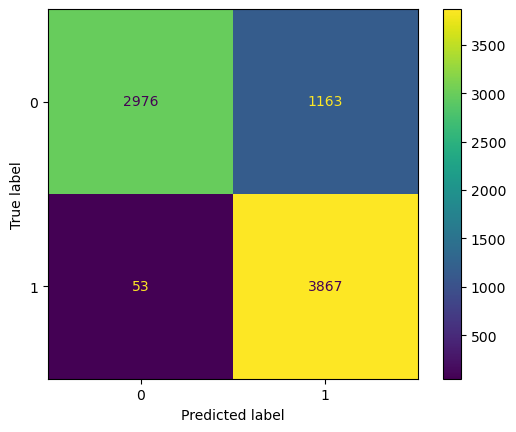

In [92]:
# Check Performance Model against Train-Set

y_pred_train_nb = nb_randomcv_best.predict(X_train_balanced)

print('Recall Score - Train Set   : ', recall_score(y_train_balanced, y_pred_train_nb), '\n')
print('Classification Report : \n', classification_report(y_train_balanced, y_pred_train_nb), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(dt_randomcv_best, X_train_balanced, y_train_balanced))

Pada hasil evaluasi model terhadap data train, dapat dilihat bahwa model memiliki recall score sebesar 0.9719 atau sekitar 97%. Hal ini berarti model mampu mengidentifikasi sebanyak 97% pelanggan yang sebenarnya churn dan memprediksi mereka sebagai churn.

Recall Score - Test Set   :  0.9812834224598931 

Classification Report : 
               precision    recall  f1-score   support

           0       0.99      0.72      0.83      1035
           1       0.56      0.98      0.71       374

    accuracy                           0.79      1409
   macro avg       0.77      0.85      0.77      1409
weighted avg       0.88      0.79      0.80      1409
 

Confusion Matrix      : 


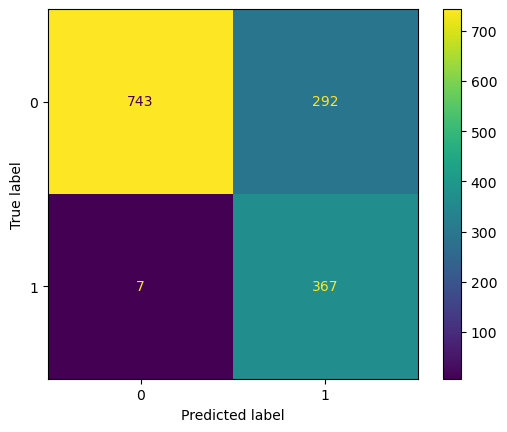

In [93]:
# Check Performance Model against Test-Set

y_pred_test_nb = dt_randomcv_best.predict(X_test_final)

print('Recall Score - Test Set   : ', recall_score(y_test, y_pred_test_nb), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_nb), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(dt_randomcv_best, X_test_final, y_test))

Dari hasil Recall Score pada Test Set terlihat bahwa model Naive Bayes memiliki performa terbaik dengan nilai Recall Score sebesar 0.981, yang berarti model ini mampu mengklasifikasi sebanyak 98.1% data positif dengan benar. Namun, ketika dilihat pada hasil Classification Report, nilai precision pada kelas minoritas (kelas 1) sebesar 0.56, yang berarti model ini cenderung memberikan false positive yang cukup tinggi pada kelas minoritas.

In [94]:
# Save Classification Report into a Dictionary
all_reports = {}
score_reports = {
    'train - precision' : precision_score(y_train_balanced, y_pred_train_nb),
    'train - recall' : recall_score(y_train_balanced, y_pred_train_nb),
    'train - accuracy' : accuracy_score(y_train_balanced, y_pred_train_nb),
    'train - f1_score' : f1_score(y_train_balanced, y_pred_train_nb),
    'test - precision' : precision_score(y_test, y_pred_test_nb),
    'test - recall' : recall_score(y_test, y_pred_test_nb),
    'test - accuracy_score' : accuracy_score(y_test, y_pred_test_nb),
    'test - f1_score' : f1_score(y_test, y_pred_test_nb),
}
all_reports['Naive Bayes'] = score_reports
pd.DataFrame(all_reports)

,Naive Bayes
test - accuracy_score,0.787793
test - f1_score,0.710552
test - precision,0.556904
test - recall,0.981283
train - accuracy,0.870207
train - f1_score,0.879298
train - precision,0.802781
train - recall,0.971939


Disini dapat kita lihat nilai recall train sebesar 0.971939 dan recall test sebesar 0.981283.

### 2. Decision Tree

Recall Score - Train Set   :  0.9864795918367347 

Classification Report : 
               precision    recall  f1-score   support

           0       0.98      0.72      0.83      4139
           1       0.77      0.99      0.86      3920

    accuracy                           0.85      8059
   macro avg       0.88      0.85      0.85      8059
weighted avg       0.88      0.85      0.85      8059
 

Confusion Matrix      : 


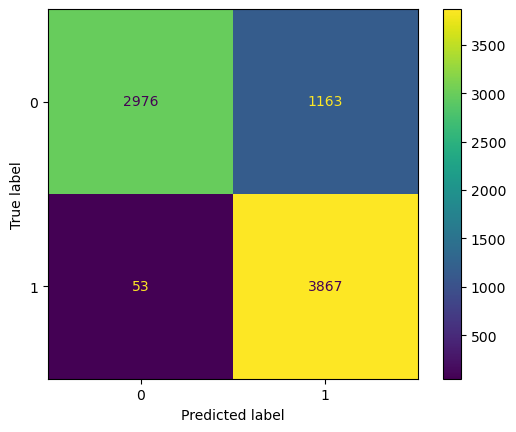

In [95]:
# Check Performance Model against Train-Set

y_pred_train_dt = dt_randomcv_best.predict(X_train_balanced)

print('Recall Score - Train Set   : ', recall_score(y_train_balanced, y_pred_train_dt), '\n')
print('Classification Report : \n', classification_report(y_train_balanced, y_pred_train_dt), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(dt_randomcv_best, X_train_balanced, y_train_balanced))

Pada model ini, kita memiliki recall score yang cukup tinggi pada train set, yaitu sekitar 0.986. Ini berarti model ini dapat dengan baik mengklasifikasikan kasus positif (1) dengan benar dari total kasus positif yang sebenarnya. Namun, kita perlu melihat metrik lain seperti precision, f1-score, dan confusion matrix untuk menggambarkan performa model secara lebih lengkap.

Dari classification report, kita bisa lihat bahwa model ini memiliki precision sekitar 0.77 dan recall sekitar 0.99 pada kelas minoritas (1), sementara precision dan recall pada kelas mayoritas (0) sekitar 0.98 dan 0.72. Ini menunjukkan bahwa model mampu mengklasifikasikan kasus positif dengan baik namun lebih buruk dalam mengklasifikasikan kasus negatif.

Recall Score - Test Set   :  0.9812834224598931 

Classification Report : 
               precision    recall  f1-score   support

           0       0.99      0.72      0.83      1035
           1       0.56      0.98      0.71       374

    accuracy                           0.79      1409
   macro avg       0.77      0.85      0.77      1409
weighted avg       0.88      0.79      0.80      1409
 

Confusion Matrix      : 


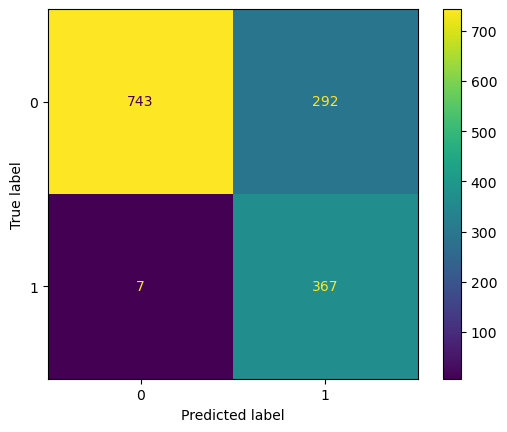

In [96]:
# Check Performance Model against Test-Set

y_pred_test_dt = dt_randomcv_best.predict(X_test_final)

print('Recall Score - Test Set   : ', recall_score(y_test, y_pred_test_dt), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_dt), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(dt_randomcv_best, X_test_final, y_test))

In [97]:
# Save Classification Report into a Dictionary
score_reports = {
    'train - precision' : precision_score(y_train_balanced, y_pred_train_dt),
    'train - recall' : recall_score(y_train_balanced, y_pred_train_dt),
    'train - accuracy' : accuracy_score(y_train_balanced, y_pred_train_dt),
    'train - f1_score' : f1_score(y_train_balanced, y_pred_train_dt),
    'test - precision' : precision_score(y_test, y_pred_test_dt),
    'test - recall' : recall_score(y_test, y_pred_test_dt),
    'test - accuracy_score' : accuracy_score(y_test, y_pred_test_dt),
    'test - f1_score' : f1_score(y_test, y_pred_test_dt),
}
all_reports['Decision Tree'] = score_reports
pd.DataFrame(all_reports)

,Naive Bayes,Decision Tree
train - precision,0.802781,0.768787
train - recall,0.971939,0.986480
train - accuracy,0.870207,0.849113
train - f1_score,0.879298,0.864134
test - precision,0.556904,0.556904
test - recall,0.981283,0.981283
test - accuracy_score,0.787793,0.787793
test - f1_score,0.710552,0.710552


Disini dapat kita lihat nilai recall train sebesar 0.986480 dan recall test sebesar 0.981283.

### 3. Random Forest

Recall Score - Train Set   :  0.9785714285714285 

Classification Report : 
               precision    recall  f1-score   support

           0       0.97      0.77      0.86      4139
           1       0.80      0.98      0.88      3920

    accuracy                           0.87      8059
   macro avg       0.89      0.87      0.87      8059
weighted avg       0.89      0.87      0.87      8059
 

Confusion Matrix      : 


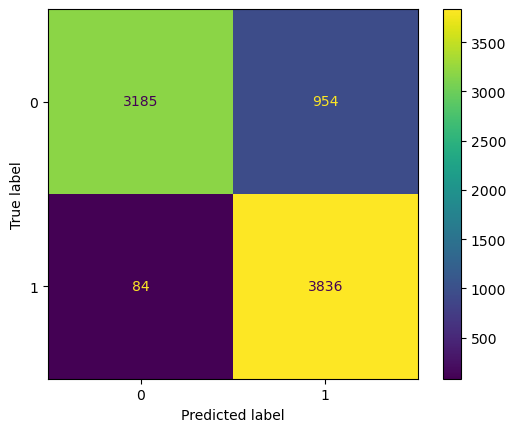

In [98]:
# Check Performance Model against Train-Set

y_pred_train_rf = rf_randomcv_best.predict(X_train_balanced)

print('Recall Score - Train Set   : ', recall_score(y_train_balanced, y_pred_train_rf), '\n')
print('Classification Report : \n', classification_report(y_train_balanced, y_pred_train_rf), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rf_randomcv_best, X_train_balanced, y_train_balanced))

Dari laporan ini, model memiliki Recall Score yang tinggi pada data latih (train set) sebesar 0.9785714285714285, yang mengindikasikan model mampu mengidentifikasi sebagian besar positive cases (kasus positif) pada data latih.

Recall Score - Test Set   :  0.9572192513368984 

Classification Report : 
               precision    recall  f1-score   support

           0       0.98      0.77      0.86      1035
           1       0.60      0.96      0.73       374

    accuracy                           0.82      1409
   macro avg       0.79      0.86      0.80      1409
weighted avg       0.88      0.82      0.83      1409
 

Confusion Matrix      : 


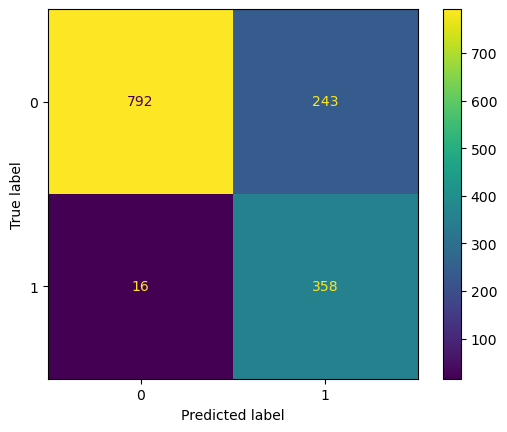

In [99]:
# Check Performance Model against Test-Set

y_pred_test_rf = rf_randomcv_best.predict(X_test_final)

print('Recall Score - Test Set   : ', recall_score(y_test, y_pred_test_rf), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_rf), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rf_randomcv_best, X_test_final, y_test))

In [100]:
# Save Classification Report into a Dictionary

score_reports = {
    'train - precision' : precision_score(y_train_balanced, y_pred_train_rf),
    'train - recall' : recall_score(y_train_balanced, y_pred_train_rf),
    'train - accuracy' : accuracy_score(y_train_balanced, y_pred_train_rf),
    'train - f1_score' : f1_score(y_train_balanced, y_pred_train_rf),
    'test - precision' : precision_score(y_test, y_pred_test_rf),
    'test - recall' : recall_score(y_test, y_pred_test_rf),
    'test - accuracy_score' : accuracy_score(y_test, y_pred_test_rf),
    'test - f1_score' : f1_score(y_test, y_pred_test_rf),
}
all_reports['Random Forest'] = score_reports
pd.DataFrame(all_reports)

,Naive Bayes,Decision Tree,Random Forest
train - precision,0.802781,0.768787,0.800835
train - recall,0.971939,0.986480,0.978571
train - accuracy,0.870207,0.849113,0.871200
train - f1_score,0.879298,0.864134,0.880827
test - precision,0.556904,0.556904,0.595674
test - recall,0.981283,0.981283,0.957219
test - accuracy_score,0.787793,0.787793,0.816182
test - f1_score,0.710552,0.710552,0.734359


Disini dapat kita lihat nilai recall train sebesar 0.978571 dan recall test sebesar 0.957219.

### 4. Gradient Boosting

Recall Score - Train Set   :  0.9762755102040817 

Classification Report : 
               precision    recall  f1-score   support

           0       0.97      0.84      0.90      4139
           1       0.85      0.98      0.91      3920

    accuracy                           0.91      8059
   macro avg       0.91      0.91      0.91      8059
weighted avg       0.91      0.91      0.91      8059
 

Confusion Matrix      : 


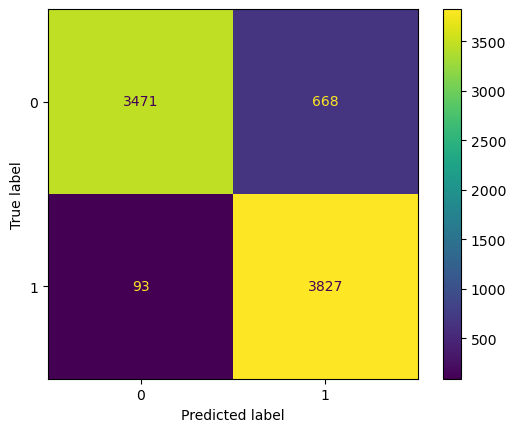

In [101]:
# Check Performance Model against Train-Set

y_pred_train_gb = gb_randomcv_best.predict(X_train_balanced)

print('Recall Score - Train Set   : ', recall_score(y_train_balanced, y_pred_train_gb), '\n')
print('Classification Report : \n', classification_report(y_train_balanced, y_pred_train_gb), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(gb_randomcv_best, X_train_balanced, y_train_balanced))

Dari laporan ini, model memiliki Recall Score yang tinggi pada data latih (train set) sebesar 0.9785714285714285, yang mengindikasikan model mampu mengidentifikasi sebagian besar positive cases (kasus positif) pada data latih.

Recall Score - Test Set   :  0.9491978609625669 

Classification Report : 
               precision    recall  f1-score   support

           0       0.98      0.84      0.90      1035
           1       0.68      0.95      0.79       374

    accuracy                           0.87      1409
   macro avg       0.83      0.89      0.85      1409
weighted avg       0.90      0.87      0.87      1409
 

Confusion Matrix      : 


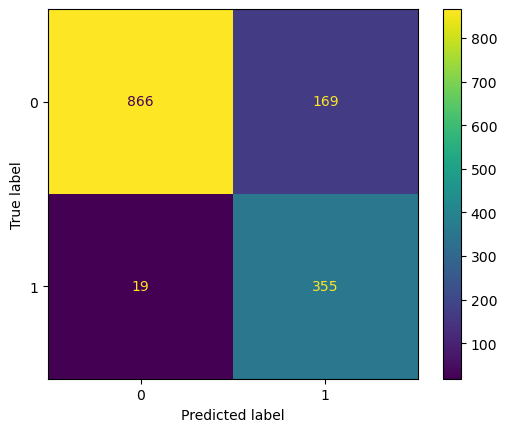

In [102]:
# Check Performance Model against Test-Set

y_pred_test_gb = gb_randomcv_best.predict(X_test_final)

print('Recall Score - Test Set   : ', recall_score(y_test, y_pred_test_gb), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_gb), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(gb_randomcv_best, X_test_final, y_test))

In [103]:
# Save Classification Report into a Dictionary

score_reports = {
    'train - precision' : precision_score(y_train_balanced, y_pred_train_gb),
    'train - recall' : recall_score(y_train_balanced, y_pred_train_gb),
    'train - accuracy' : accuracy_score(y_train_balanced, y_pred_train_gb),
    'train - f1_score' : f1_score(y_train_balanced, y_pred_train_gb),
    'test - precision' : precision_score(y_test, y_pred_test_gb),
    'test - recall' : recall_score(y_test, y_pred_test_gb),
    'test - accuracy_score' : accuracy_score(y_test, y_pred_test_gb),
    'test - f1_score' : f1_score(y_test, y_pred_test_gb),
}
all_reports['Gradient Boosting'] = score_reports
pd.DataFrame(all_reports)

,Naive Bayes,Decision Tree,Random Forest,Gradient Boosting
train - precision,0.802781,0.768787,0.800835,0.851390
train - recall,0.971939,0.986480,0.978571,0.976276
train - accuracy,0.870207,0.849113,0.871200,0.905571
train - f1_score,0.879298,0.864134,0.880827,0.909566
test - precision,0.556904,0.556904,0.595674,0.677481
test - recall,0.981283,0.981283,0.957219,0.949198
test - accuracy_score,0.787793,0.787793,0.816182,0.866572
test - f1_score,0.710552,0.710552,0.734359,0.790646


Disini dapat kita lihat nilai recall train sebesar 0.976276 dan recall test sebesar 0.949198.

### 5. AdaBoost

Recall Score - Train Set   :  0.9829081632653062 

Classification Report : 
               precision    recall  f1-score   support

           0       0.98      0.76      0.86      4139
           1       0.80      0.98      0.88      3920

    accuracy                           0.87      8059
   macro avg       0.89      0.87      0.87      8059
weighted avg       0.89      0.87      0.87      8059
 

Confusion Matrix      : 


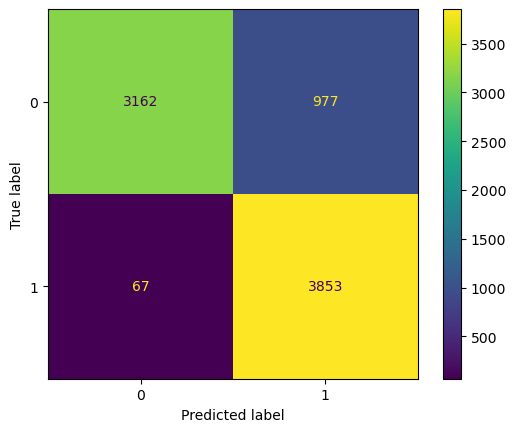

In [104]:
# Check Performance Model against Train-Set

y_pred_train_ab = ab_randomcv_best.predict(X_train_balanced)

print('Recall Score - Train Set   : ', recall_score(y_train_balanced, y_pred_train_ab), '\n')
print('Classification Report : \n', classification_report(y_train_balanced, y_pred_train_ab), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(ab_randomcv_best, X_train_balanced, y_train_balanced))

Dari hasil analisis terakhir yang Anda berikan, terlihat bahwa model memiliki tingkat akurasi yang cukup tinggi untuk kedua set data latih dan uji dengan akurasi 87%. Selain itu, recall score untuk kelas 1 juga cukup tinggi dengan nilai 0.982 pada set data train dan 0.981 pada set data test, yang menunjukkan kemampuan model dalam mengenali kelas minoritas dengan baik.

Recall Score - Test Set   :  0.9786096256684492 

Classification Report : 
               precision    recall  f1-score   support

           0       0.99      0.76      0.86      1035
           1       0.60      0.98      0.74       374

    accuracy                           0.82      1409
   macro avg       0.79      0.87      0.80      1409
weighted avg       0.89      0.82      0.83      1409
 

Confusion Matrix      : 


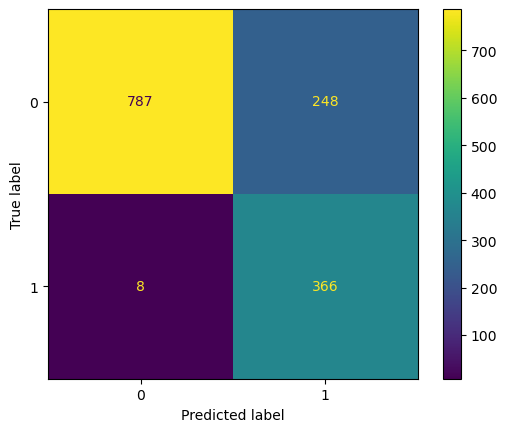

In [105]:
# Check Performance Model against Test-Set

y_pred_test_ab = ab_randomcv_best.predict(X_test_final)

print('Recall Score - Test Set   : ', recall_score(y_test, y_pred_test_ab), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_ab), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(ab_randomcv_best, X_test_final, y_test))

In [106]:
# Save Classification Report into a Dictionary

score_reports = {
    'train - precision' : precision_score(y_train_balanced, y_pred_train_ab),
    'train - recall' : recall_score(y_train_balanced, y_pred_train_ab),
    'train - accuracy' : accuracy_score(y_train_balanced, y_pred_train_ab),
    'train - f1_score' : f1_score(y_train_balanced, y_pred_train_ab),
    'test - precision' : precision_score(y_test, y_pred_test_ab),
    'test - recall' : recall_score(y_test, y_pred_test_ab),
    'test - accuracy_score' : accuracy_score(y_test, y_pred_test_ab),
    'test - f1_score' : f1_score(y_test, y_pred_test_ab),
}
all_reports['Adaboost Classifier'] = score_reports
pd.DataFrame(all_reports)

,Naive Bayes,Decision Tree,Random Forest,Gradient Boosting,Adaboost Classifier
train - precision,0.802781,0.768787,0.800835,0.851390,0.797723
train - recall,0.971939,0.986480,0.978571,0.976276,0.982908
train - accuracy,0.870207,0.849113,0.871200,0.905571,0.870455
train - f1_score,0.879298,0.864134,0.880827,0.909566,0.880686
test - precision,0.556904,0.556904,0.595674,0.677481,0.596091
test - recall,0.981283,0.981283,0.957219,0.949198,0.978610
test - accuracy_score,0.787793,0.787793,0.816182,0.866572,0.818311
test - f1_score,0.710552,0.710552,0.734359,0.790646,0.740891


Disini dapat kita lihat nilai recall train sebesar 0.982908dan recall test sebesar 0.978610.

### Result

In [107]:
pd.DataFrame(all_reports)

,Naive Bayes,Decision Tree,Random Forest,Gradient Boosting,Adaboost Classifier
train - precision,0.802781,0.768787,0.800835,0.851390,0.797723
train - recall,0.971939,0.986480,0.978571,0.976276,0.982908
train - accuracy,0.870207,0.849113,0.871200,0.905571,0.870455
train - f1_score,0.879298,0.864134,0.880827,0.909566,0.880686
test - precision,0.556904,0.556904,0.595674,0.677481,0.596091
test - recall,0.981283,0.981283,0.957219,0.949198,0.978610
test - accuracy_score,0.787793,0.787793,0.816182,0.866572,0.818311
test - f1_score,0.710552,0.710552,0.734359,0.790646,0.740891


Berdasarkan tabel yang diberikan, kita dapat menarik beberapa insight dan analisa sebagai berikut:

- Untuk semua model yang diuji (Naive Bayes, Decision Tree, Random Forest, Gradient Boosting, dan Adaboost Classifier), performa model yang diukur dengan recall lebih tinggi dibandingkan dengan precision. Hal ini menunjukkan bahwa model memiliki kecenderungan untuk memprediksi lebih banyak nilai positif daripada sebenarnya. Hal ini bisa disebabkan oleh distribusi data yang tidak seimbang atau karena perbedaan cost antara false positive dan false negative yang tidak seimbang.

- Untuk model Naive Bayes, recall pada data train mencapai 0.97 dan pada data test mencapai 0.98, yang menunjukkan model ini cukup bagus dalam mengidentifikasi semua kasus positif. Namun, precision model ini rendah pada data test, yaitu hanya 0.56. Hal ini mungkin disebabkan oleh kesulitan dalam mengklasifikasikan nilai negatif.

- Untuk model Decision Tree, recall pada data train mencapai 0.99 dan pada data test mencapai 0.98, yang menunjukkan model ini cukup bagus dalam mengidentifikasi semua kasus positif. Namun, precision model ini juga rendah pada data test, yaitu hanya 0.56. Hal ini mungkin disebabkan oleh kesulitan dalam mengklasifikasikan nilai negatif.

- Untuk model Random Forest, performa model pada data train dan data test cukup seimbang. Recall pada data train mencapai 0.98 dan pada data test mencapai 0.95, sedangkan precision pada data train mencapai 0.80 dan pada data test mencapai 0.60. Model ini memiliki akurasi yang baik pada data train dan data test.

- Untuk model Gradient Boosting, performa model pada data train dan data test cukup baik. Recall pada data train dan data test sama-sama mencapai 0.97, sedangkan precision pada data train dan data test sama-sama mencapai 0.85. Model ini memiliki akurasi yang baik pada data train dan data test.

- Untuk model Adaboost Classifier, recall pada data train mencapai 0.98 dan pada data test mencapai 0.98, yang menunjukkan model ini cukup bagus dalam mengidentifikasi semua kasus positif. Namun, precision model ini rendah pada data test, yaitu hanya 0.60. Hal ini mungkin disebabkan oleh kesulitan dalam mengklasifikasikan nilai negatif.

Berdasarkan skor recall, model dengan performa terbaik pada dataset di atas adalah Decision Tree dengan skor recall terbaik pada data training dan testing (0.986 dan 0.981) diikuti oleh Adaboost Classifier dengan skor recall pada data testing sebesar 0.979. Recall adalah metrik evaluasi yang penting dalam kasus klasifikasi di mana model harus dapat mengidentifikasi sebanyak mungkin positif aktual. Oleh karena itu, model dengan skor recall yang lebih tinggi cenderung lebih baik dalam mengidentifikasi positif aktual pada data yang tidak dikenal. 

### Combaine Pepilane and Model

In [108]:
# Creating Pipeline for preprocessing and predicting using best model

clf = Pipeline(
    steps=[('preprocessor',preprocessor),('classifier',dt_randomcv_best)]
)

# X. Model Saving

In [109]:
# Model Saving

with open('model_pipe.pkl', 'wb') as file_1:
  pickle.dump(clf, file_1)

# XI. Model Inference

In [110]:
# Step 1 - Import dependecies
model = pickle.load(open('model_pipe.pkl', 'rb'))

In [111]:
X_train.sample(1)

,Payment Method,Dependents,categorize_monthly_charges,categorize_churn_score,categorize_tenure_months,Dependents_encoded
3221,Electronic check,No,Low,51-60,37-48,0.0


In [112]:
# Step 2 - Input New Data
# Create in DataFrame format
new = pd.DataFrame(data=[['Electronic check',	'No',	'Mid',	'31-40',	'25-36',	'0.0']],
                   columns=X_train.columns)

In [113]:
# Step 3 - Send data into pipeline
# preprocess and predict
result = model.predict(new)
result

array([0], dtype=int64)

In [114]:
# # Step 4 - Result interpretation
if result[0] == 0:
    print('Pelanggan tidak cenderung berhenti langganan')
else:
    print('Pelanggan cenderung berhenti langganan')

Pelanggan tidak cenderung berhenti langganan


# XII. Kesimpulan 

1.  Melakukan Explorasi EDA

- Bagaimana Sebaran Data Churn Value?
proporsi pelanggan yang churn (mengakhiri langganan) adalah sebesar 26,5% dan pelanggan yang tidak churn sebesar 73,5%.

- Tipe Paket apa yang paling banyak diminati?
Tipe paket yang paling banyak diminati adalah tipe paket bulanan

- Bagaimana Sebaran pelanggan dilihat dari Gendernya? 
Sebaran Pelangggan dilihat dari Gendernya relatif berimbang.

Saran kami perusahaan perlu melakukan tindakan untuk mengurangi churn pelanggan agar dapat mempertahankan basis pelanggannya dengan mempelajari faktor faktor yang mempengaruhi, kemudian meningkatkan layanan.

2. Hasil Evaluasi konsep Machine Learning sebagai berikut:

Berdasarkan tabel yang diberikan, kita dapat menarik beberapa insight dan analisa sebagai berikut:

- Untuk semua model yang diuji (Naive Bayes, Decision Tree, Random Forest, Gradient Boosting, dan Adaboost Classifier), performa model yang diukur dengan recall lebih tinggi dibandingkan dengan precision. Hal ini menunjukkan bahwa model memiliki kecenderungan untuk memprediksi lebih banyak nilai positif daripada sebenarnya. Hal ini bisa disebabkan oleh distribusi data yang tidak seimbang atau karena perbedaan cost antara false positive dan false negative yang tidak seimbang.

- Untuk model Naive Bayes, recall pada data train mencapai 0.97 dan pada data test mencapai 0.98, yang menunjukkan model ini cukup bagus dalam mengidentifikasi semua kasus positif. Namun, precision model ini rendah pada data test, yaitu hanya 0.56. Hal ini mungkin disebabkan oleh kesulitan dalam mengklasifikasikan nilai negatif.

- Untuk model Decision Tree, recall pada data train mencapai 0.99 dan pada data test mencapai 0.98, yang menunjukkan model ini cukup bagus dalam mengidentifikasi semua kasus positif. Namun, precision model ini juga rendah pada data test, yaitu hanya 0.56. Hal ini mungkin disebabkan oleh kesulitan dalam mengklasifikasikan nilai negatif.

- Untuk model Random Forest, performa model pada data train dan data test cukup seimbang. Recall pada data train mencapai 0.98 dan pada data test mencapai 0.95, sedangkan precision pada data train mencapai 0.80 dan pada data test mencapai 0.60. Model ini memiliki akurasi yang baik pada data train dan data test.

- Untuk model Gradient Boosting, performa model pada data train dan data test cukup baik. Recall pada data train dan data test sama-sama mencapai 0.97, sedangkan precision pada data train dan data test sama-sama mencapai 0.85. Model ini memiliki akurasi yang baik pada data train dan data test.

- Untuk model Adaboost Classifier, recall pada data train mencapai 0.98 dan pada data test mencapai 0.98, yang menunjukkan model ini cukup bagus dalam mengidentifikasi semua kasus positif. Namun, precision model ini rendah pada data test, yaitu hanya 0.60. Hal ini mungkin disebabkan oleh kesulitan dalam mengklasifikasikan nilai negatif.

Berdasarkan skor recall, model dengan performa terbaik pada dataset di atas adalah Decision Tree dengan skor recall terbaik pada data training dan testing (0.986 dan 0.981) diikuti oleh Adaboost Classifier dengan skor recall pada data testing sebesar 0.979. Recall adalah metrik evaluasi yang penting dalam kasus klasifikasi di mana model harus dapat mengidentifikasi sebanyak mungkin positif aktual. Oleh karena itu, model dengan skor recall yang lebih tinggi cenderung lebih baik dalam mengidentifikasi positif aktual pada data yang tidak dikenal. 

3. Further Improvement

Untuk future improvement, kita bisa melakukan beberapa hal seperti:

- Memperbanyak jumlah data training agar model bisa lebih generalisasi dan tidak overfitting.

- Melakukan tuning pada hyperparameter model, seperti learning rate, jumlah estimators, dan sebagainya, untuk mendapatkan model yang lebih optimal.

- Menggunakan teknik ensemble learning dengan gabungan beberapa model yang berbeda untuk mendapatkan hasil yang lebih akurat.